In [1]:
!ls

1_notmnist.ipynb	5_word2vec.ipynb  BBAS3.csv  Stocks.ipynb
2_fullyconnected.ipynb	6_lstm.ipynb	  BBDC3.csv  Untitled.ipynb
3_regularization.ipynb	ABEV3.csv	  BBDC4.csv  init_jupyter.sh
4_convolutions.ipynb	B3SA3.csv	  BBSE3.csv  notMNIST.pickle


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18, 6)

In [2]:
df = pd.read_csv('BBAS3.csv', index_col = 'Date', parse_dates=True)
df.head()

Open   High    Low  Close    Volume
Date                                            
2017-12-05  31.48  32.30  30.85  31.07   9200500
2017-12-06  30.92  32.01  30.51  32.01   9198200
2017-12-07  31.20  31.36  30.49  30.77  14666200
2017-12-08  31.48  31.61  30.95  30.95   6115600
2017-12-11  31.35  31.60  30.70  30.70   7167500

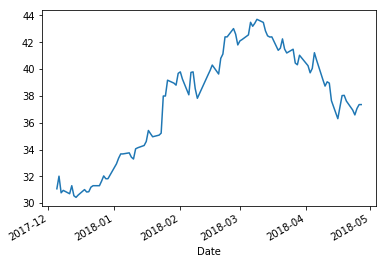

In [3]:
df['Close'].plot()

In [78]:
def lin_regression(y):
    from scipy.stats import linregress
    """Simple linear regression (y = m * x + b + error)."""
    x = list(range(len(y)))
    y = y/min(y) 
    plt.plot(x,y,'*-')
    plt.show()
    m, b, R, p, SEm = linregress(x, y)
    return m, b, R

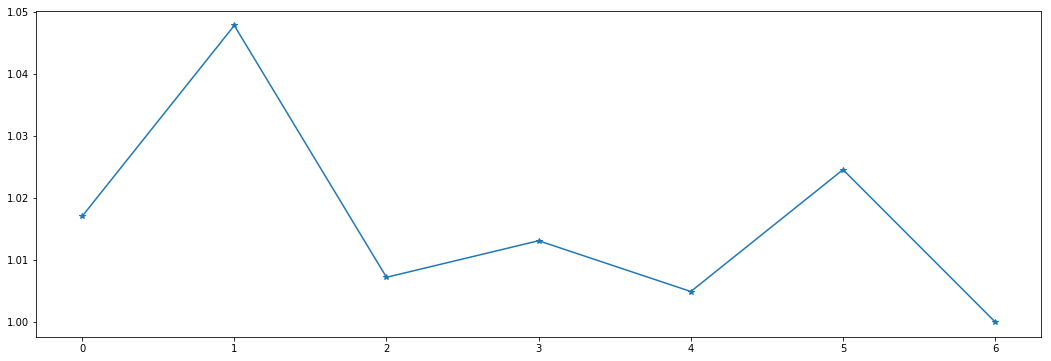

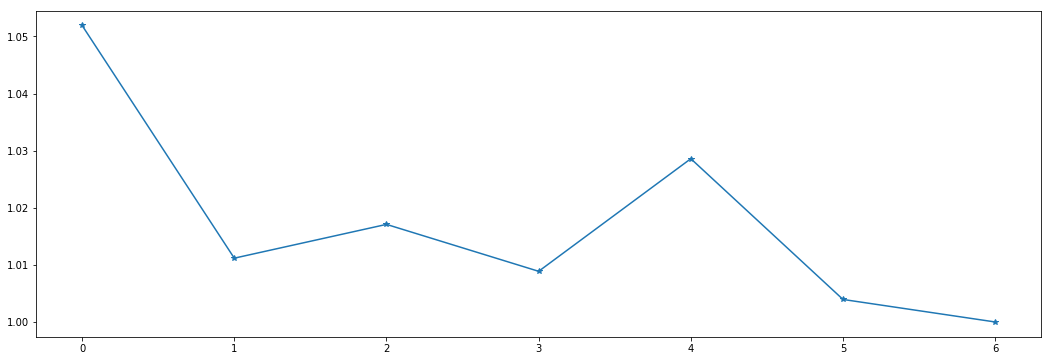

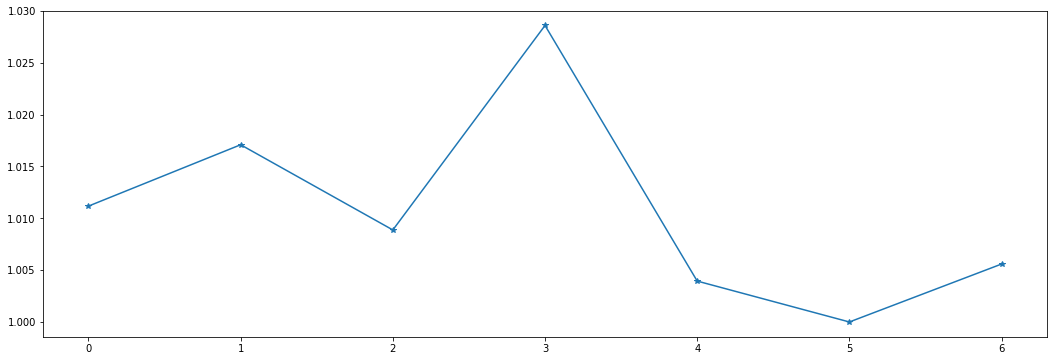

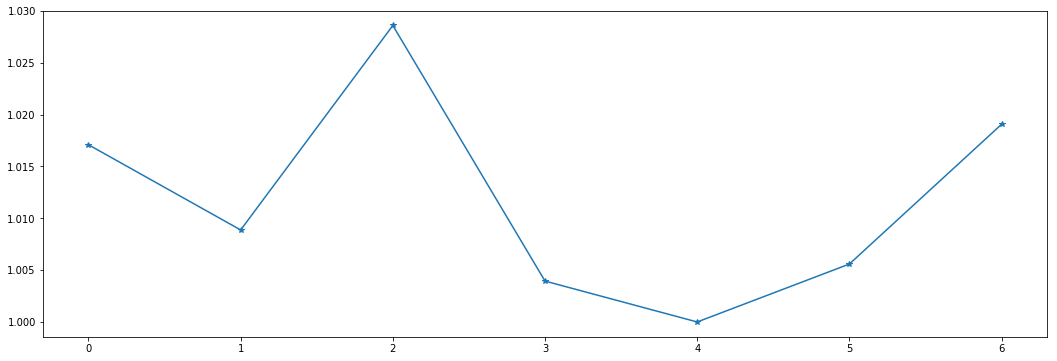

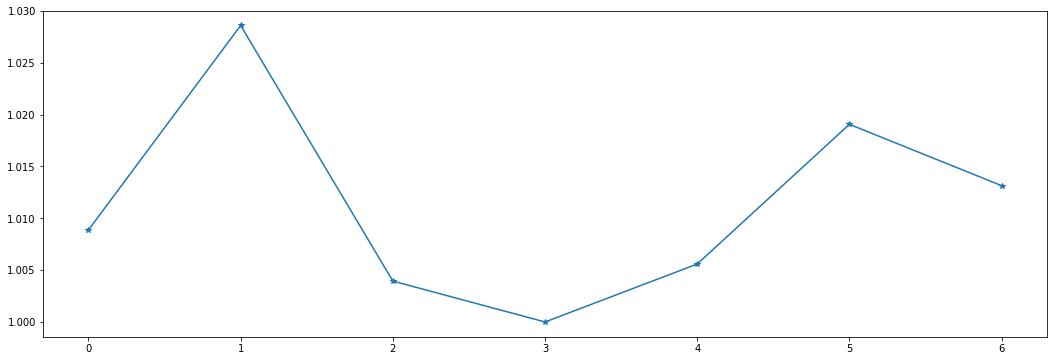

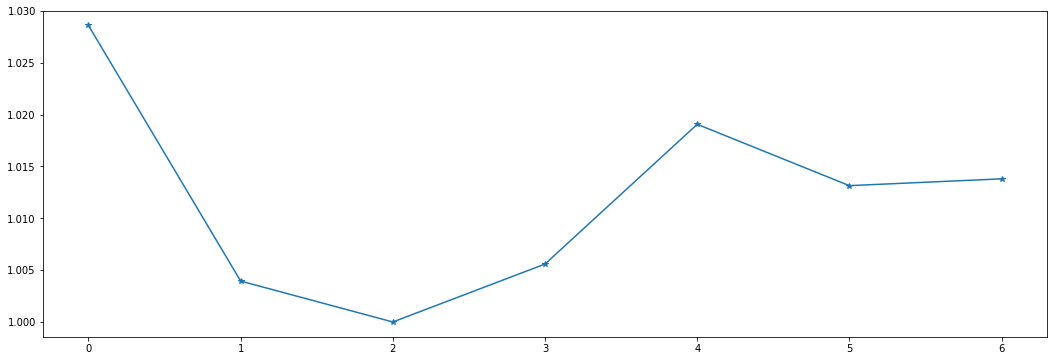

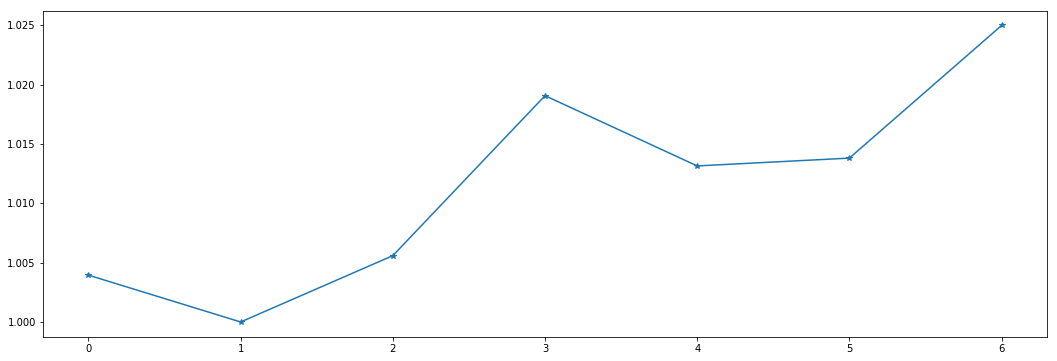

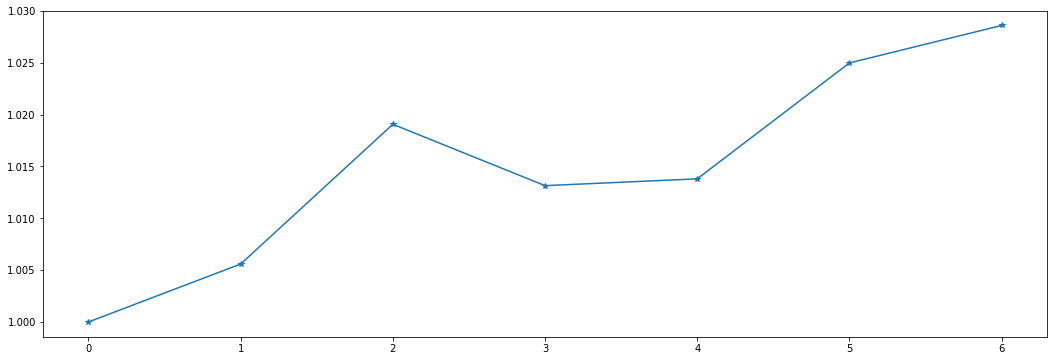

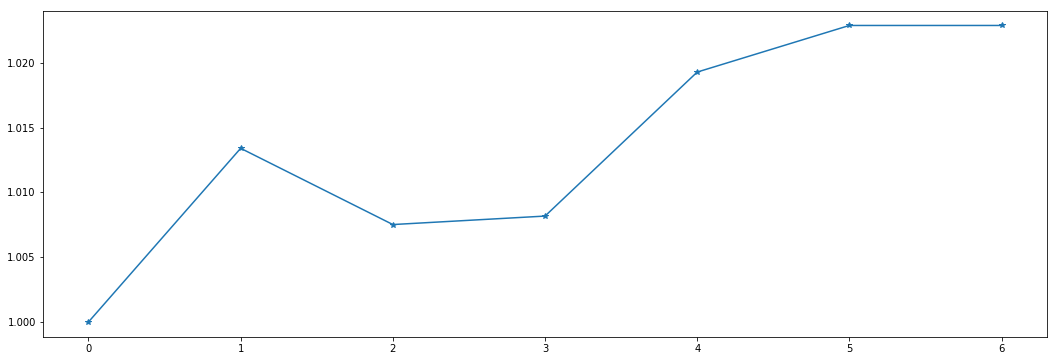

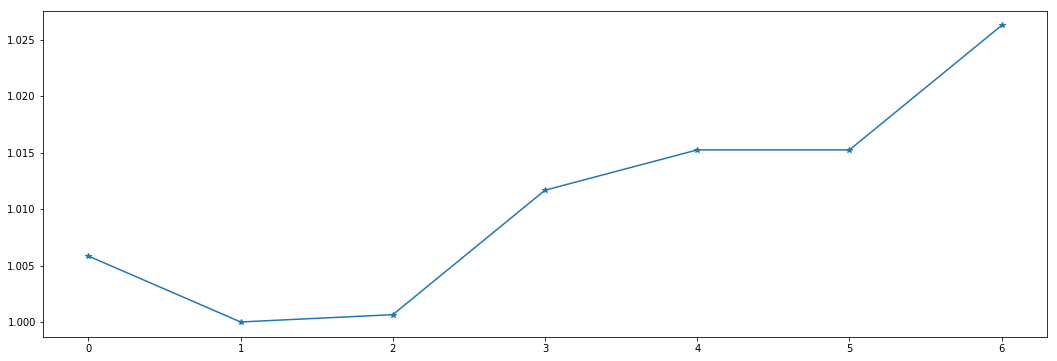

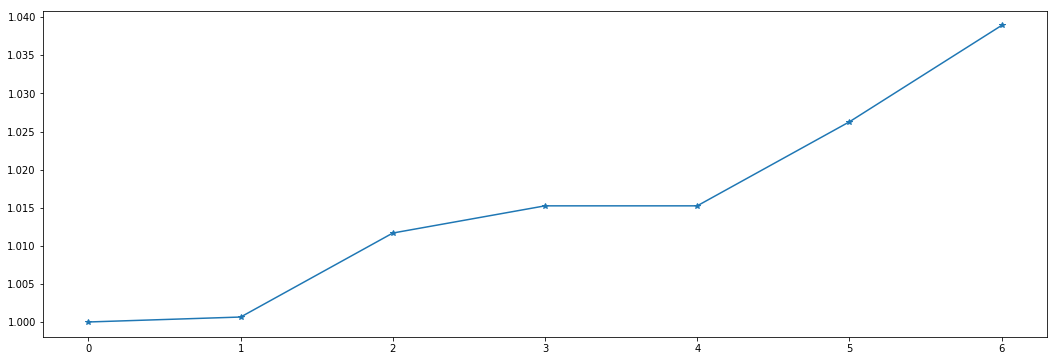

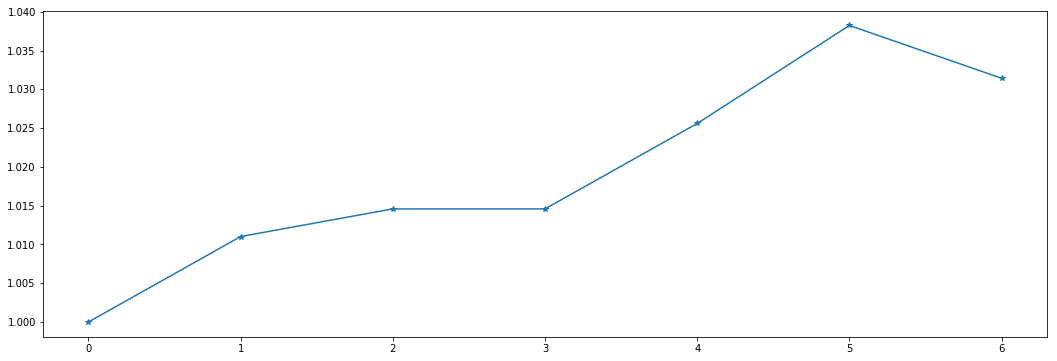

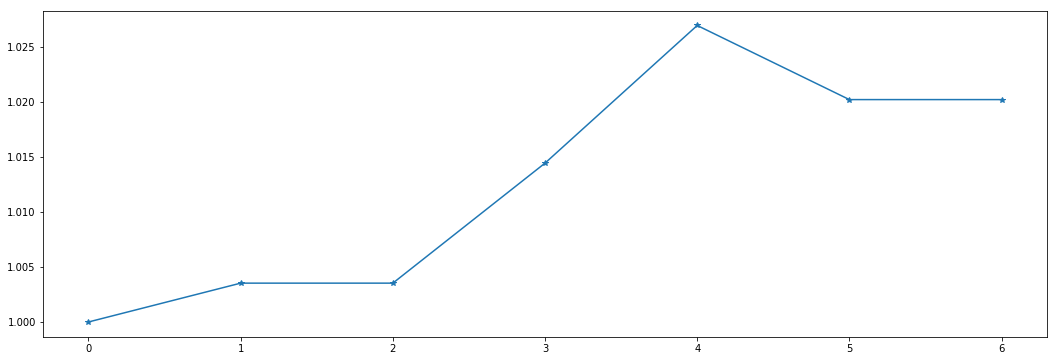

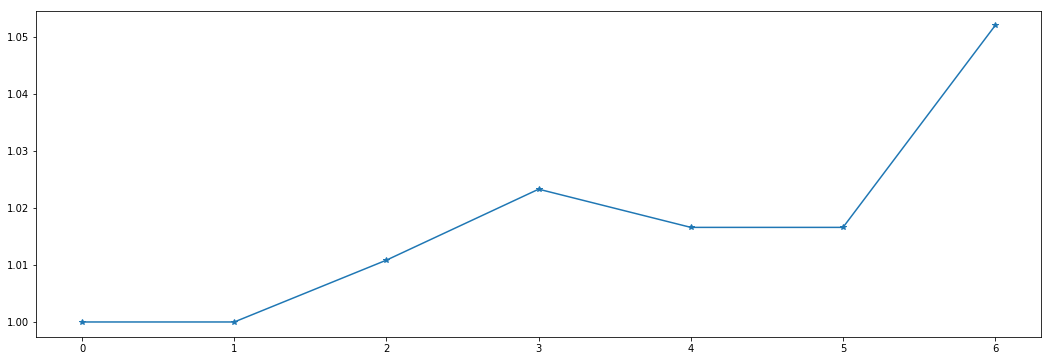

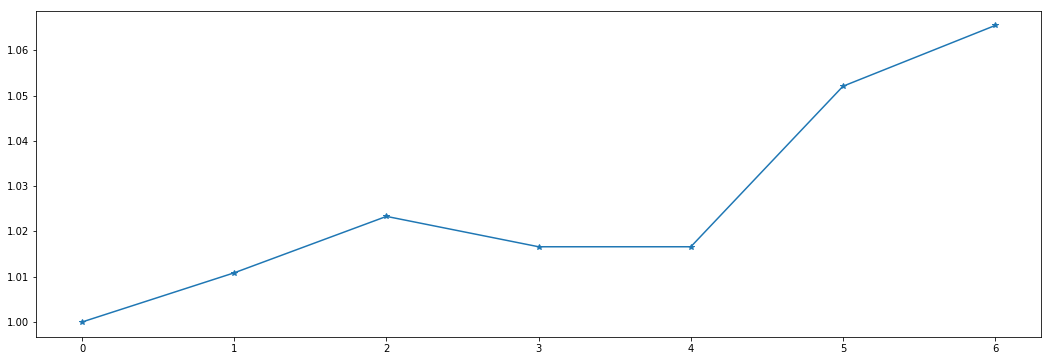

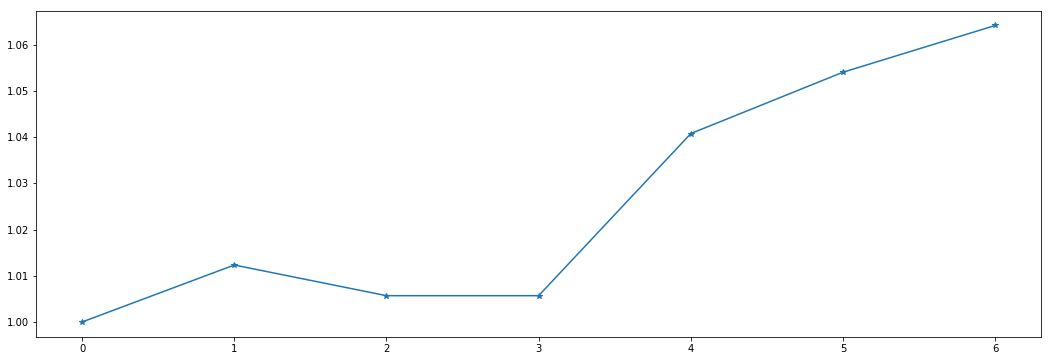

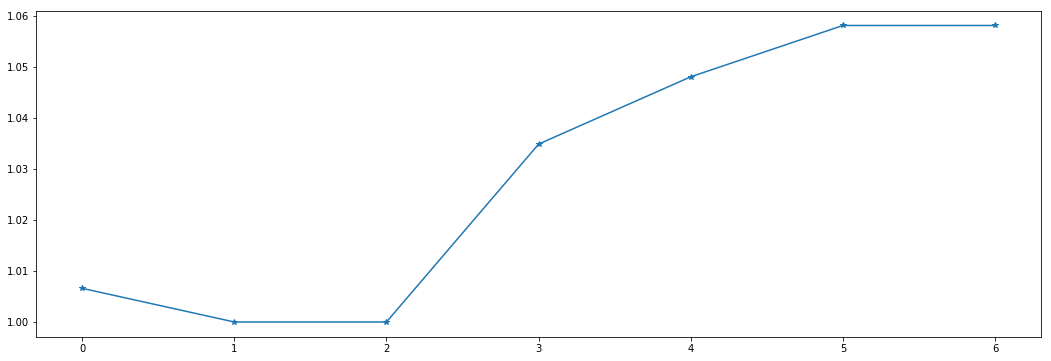

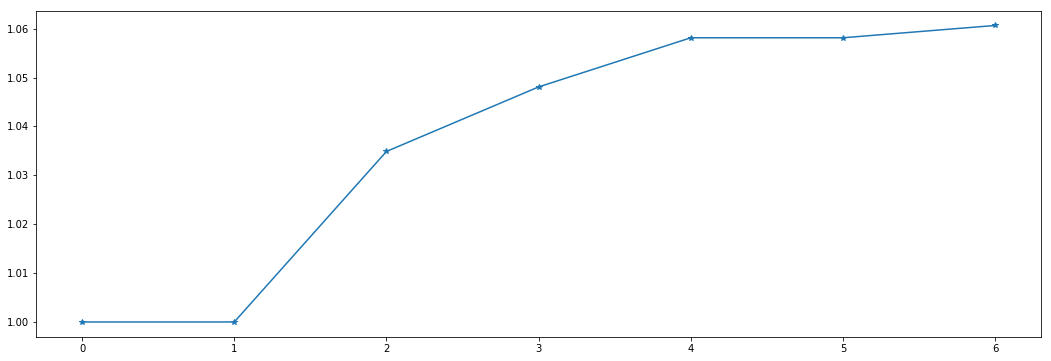

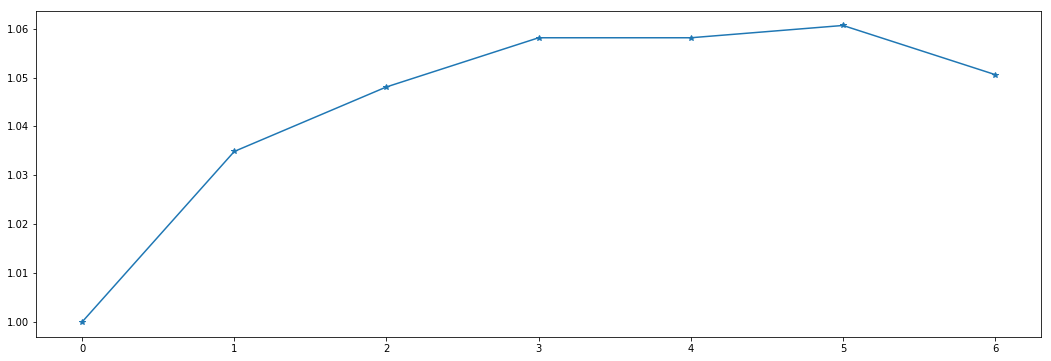

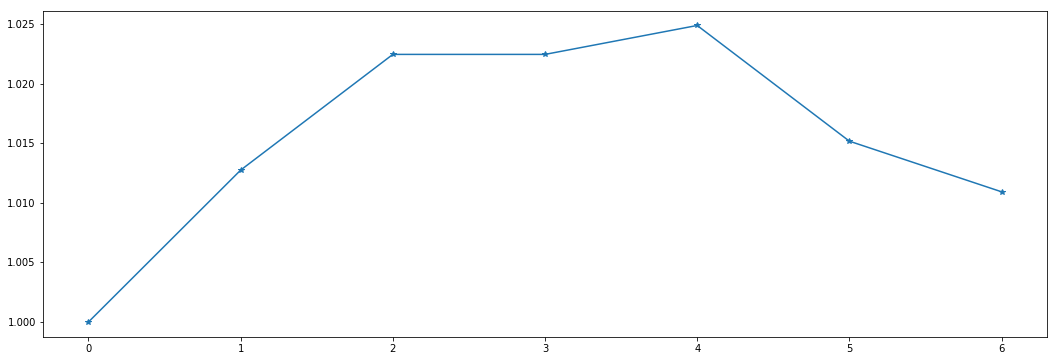

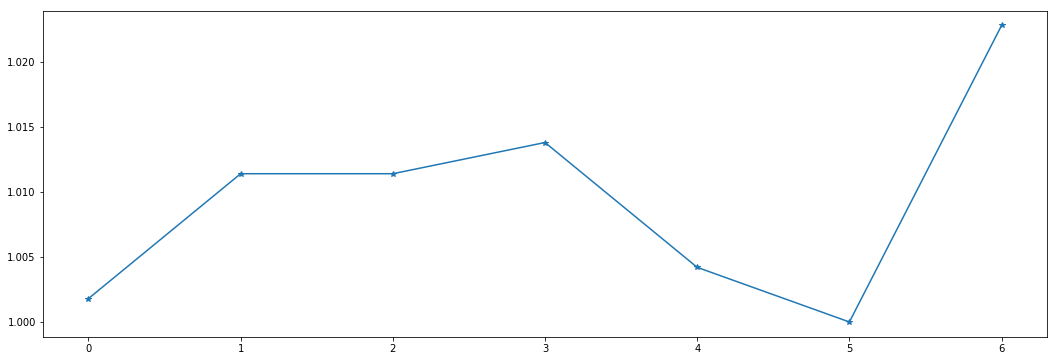

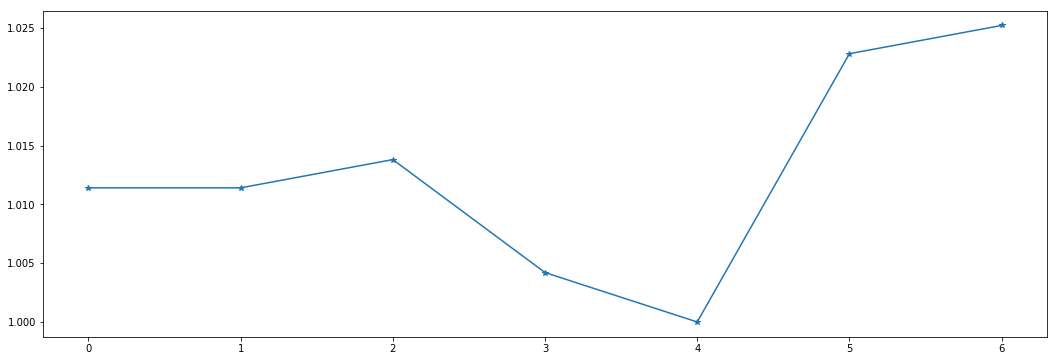

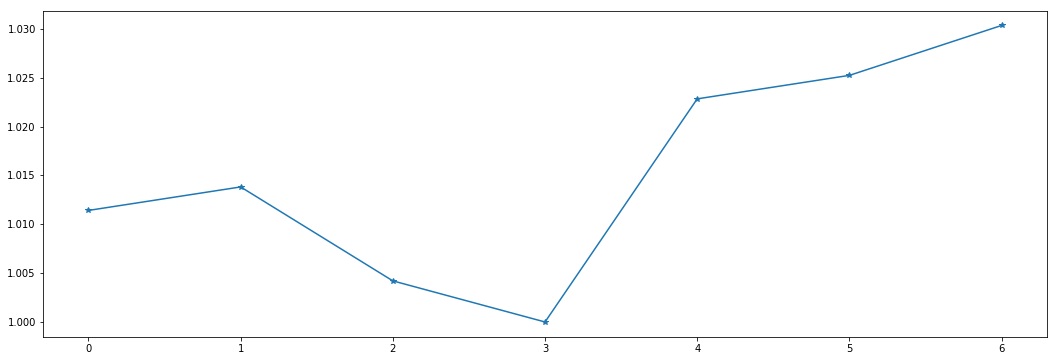

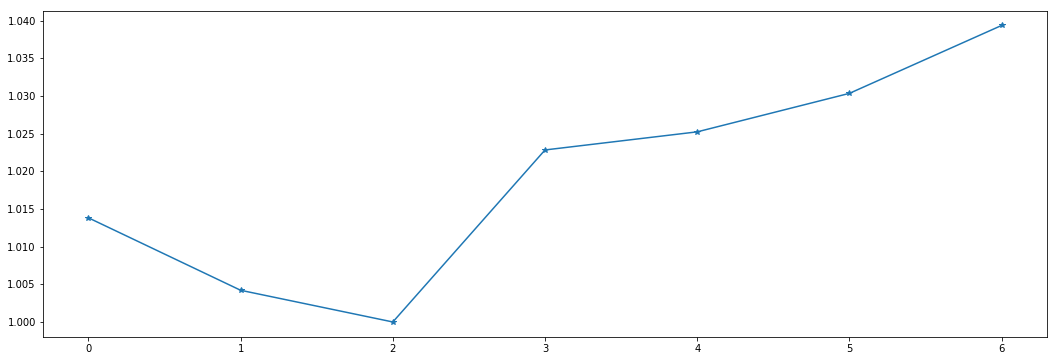

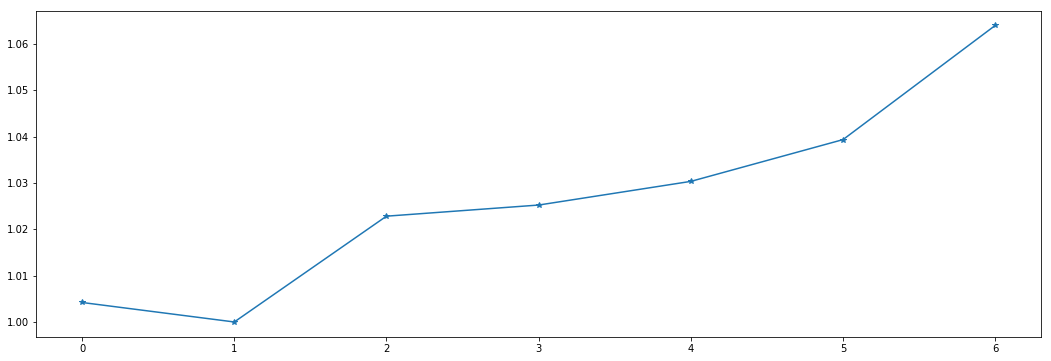

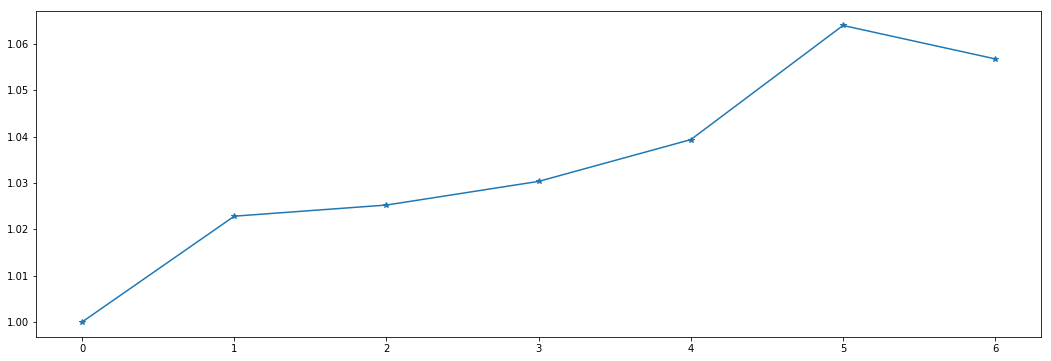

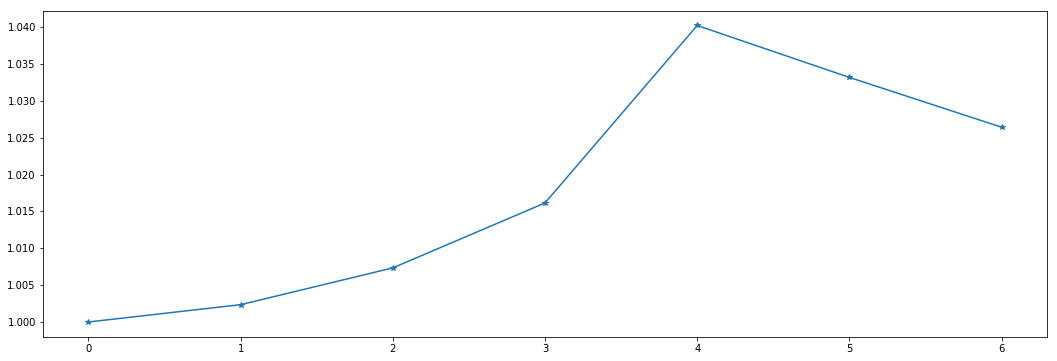

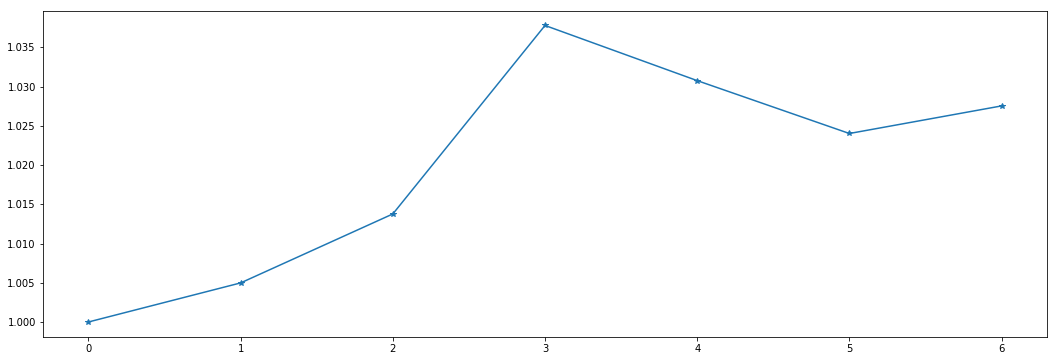

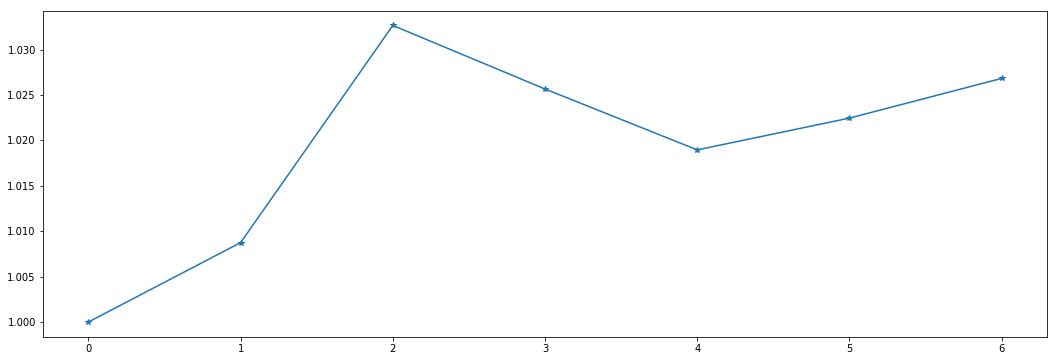

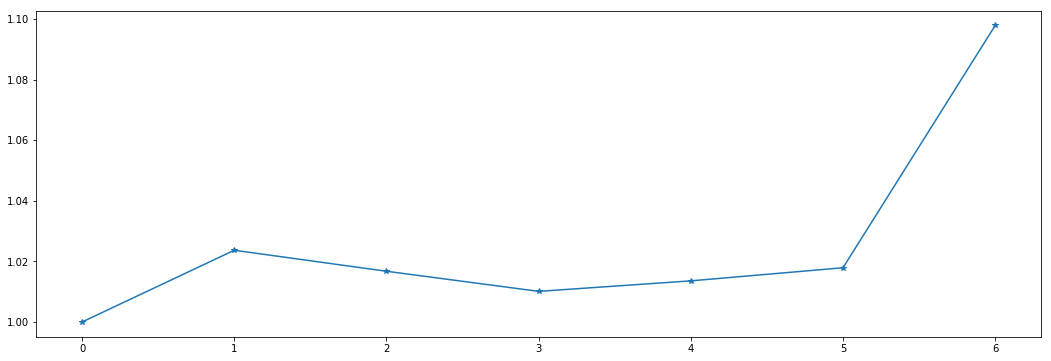

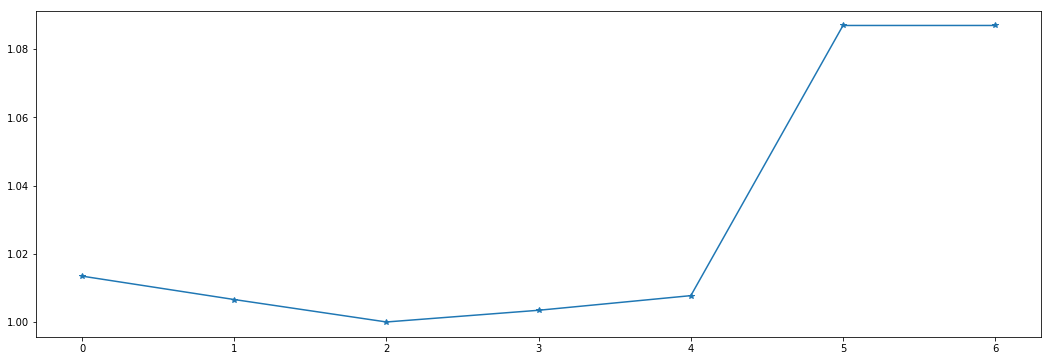

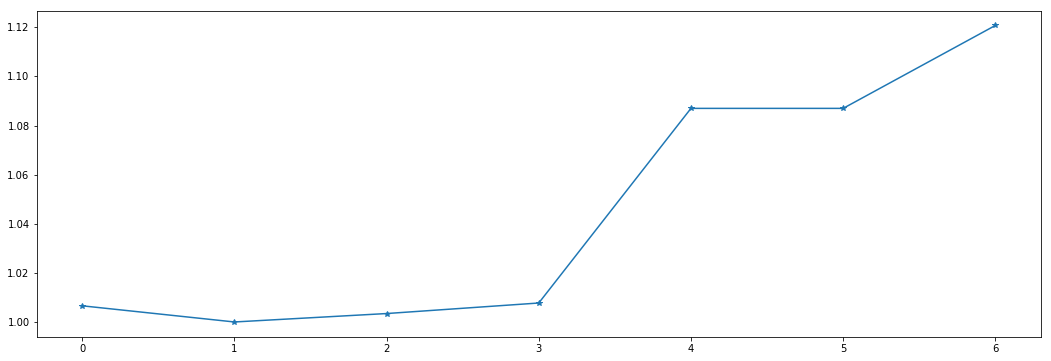

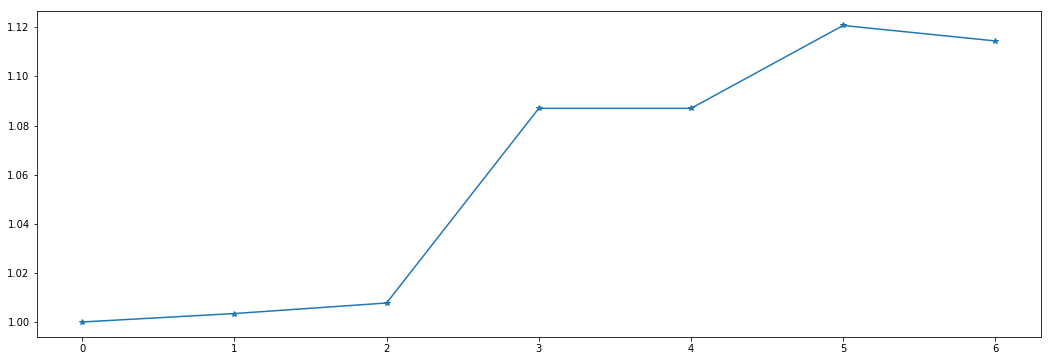

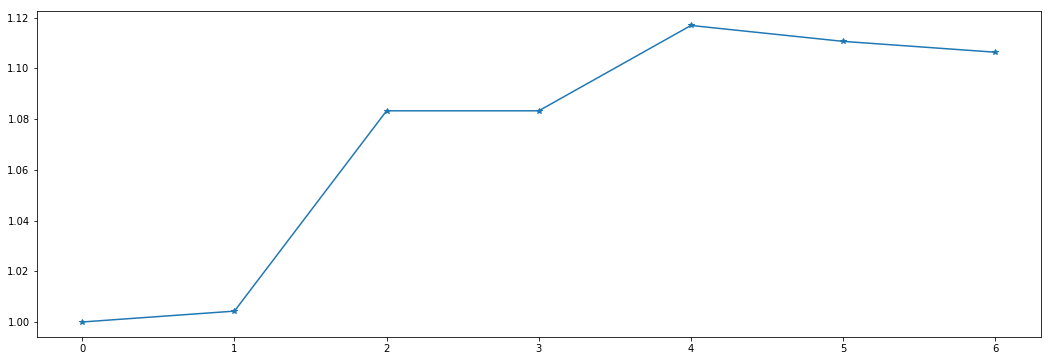

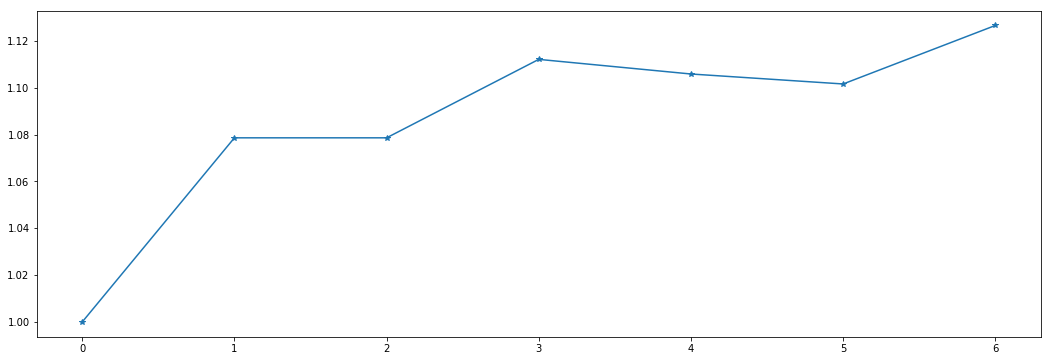

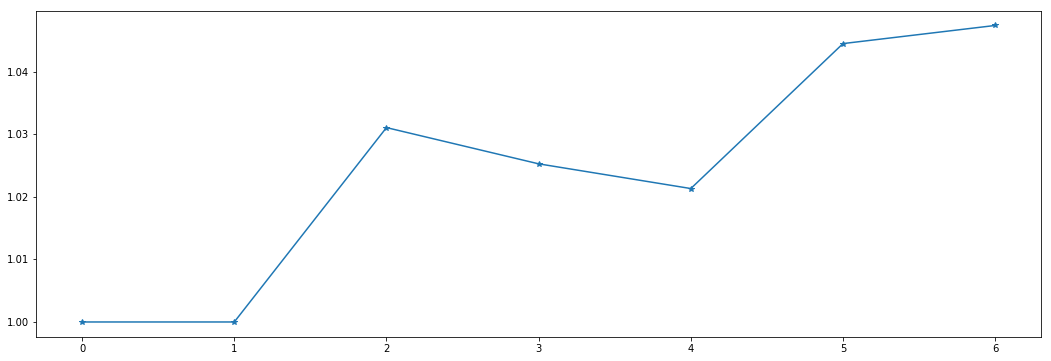

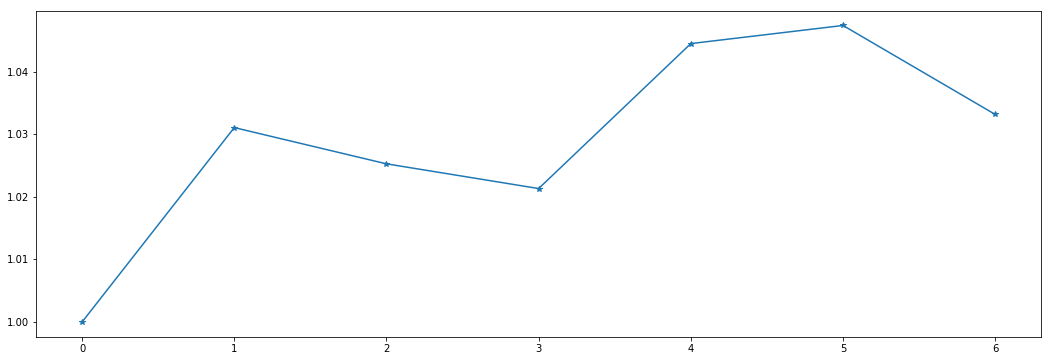

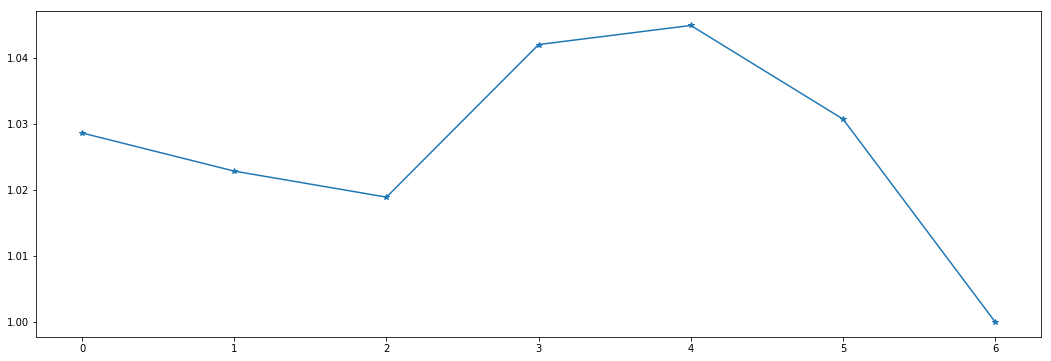

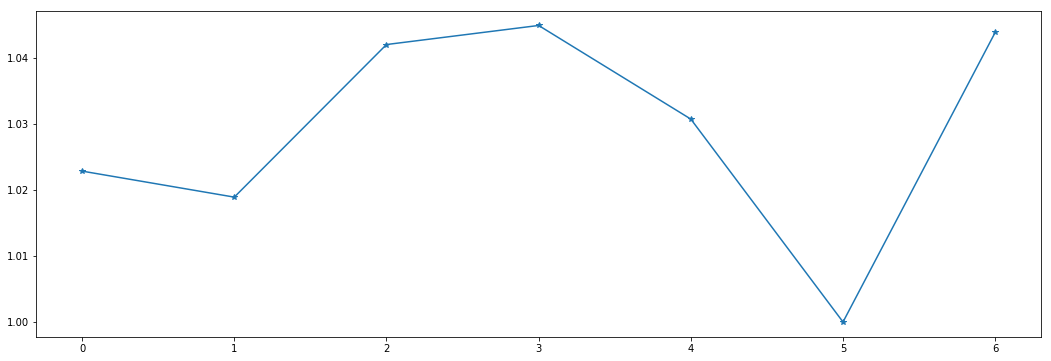

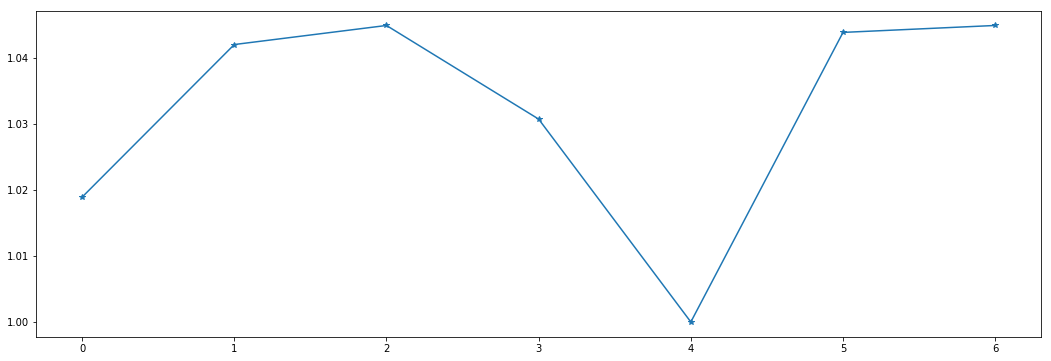

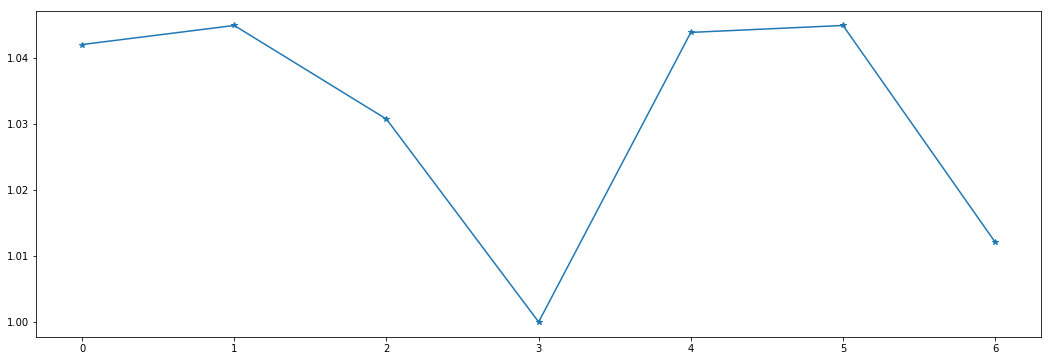

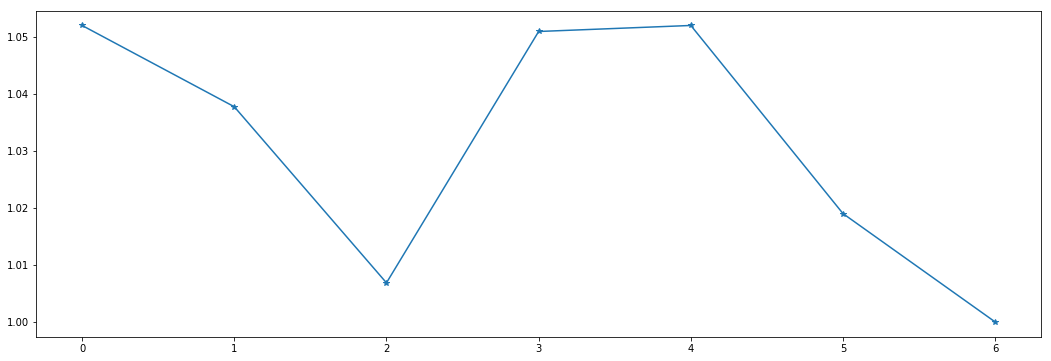

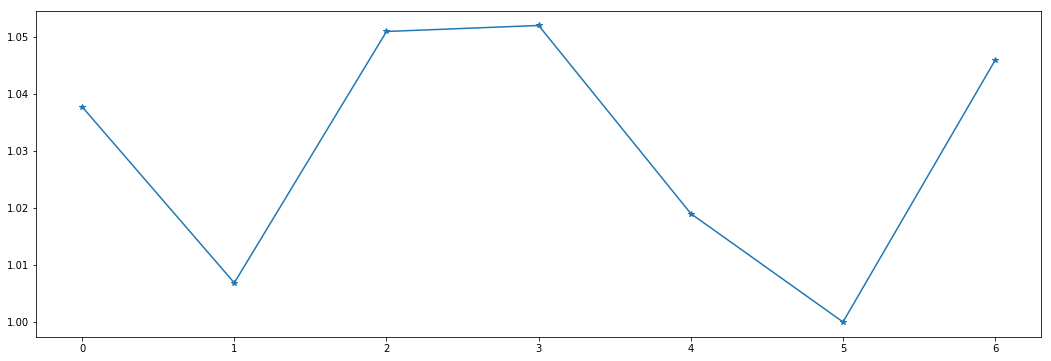

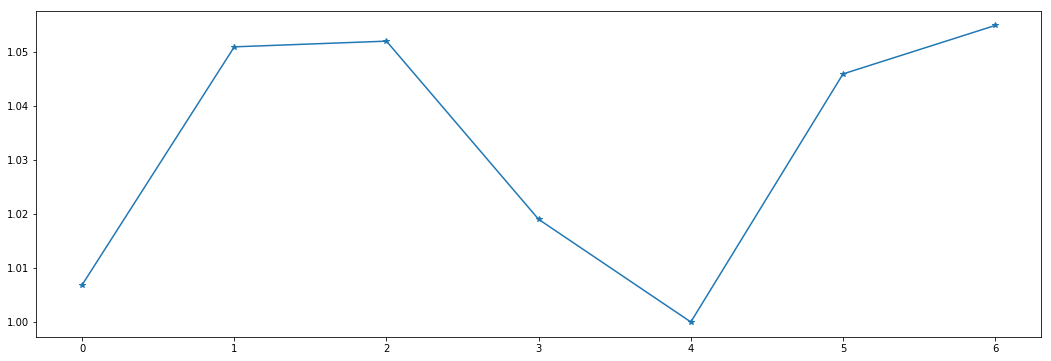

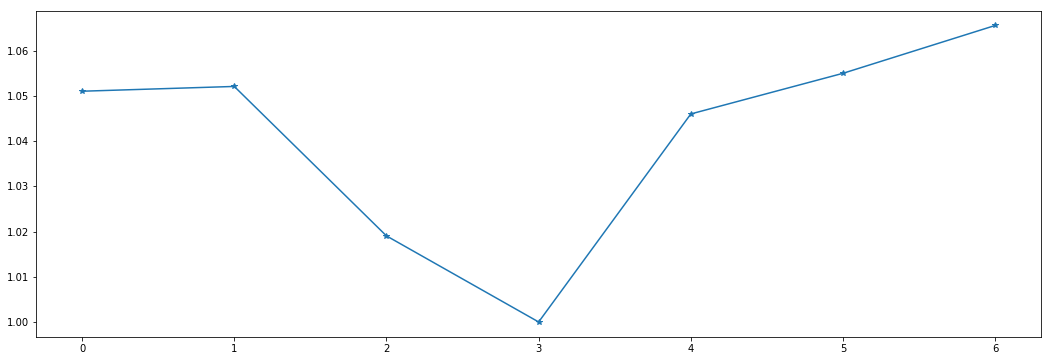

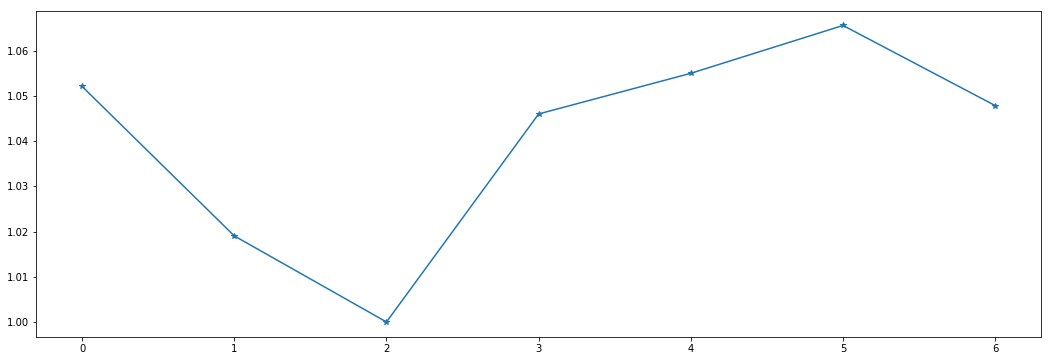

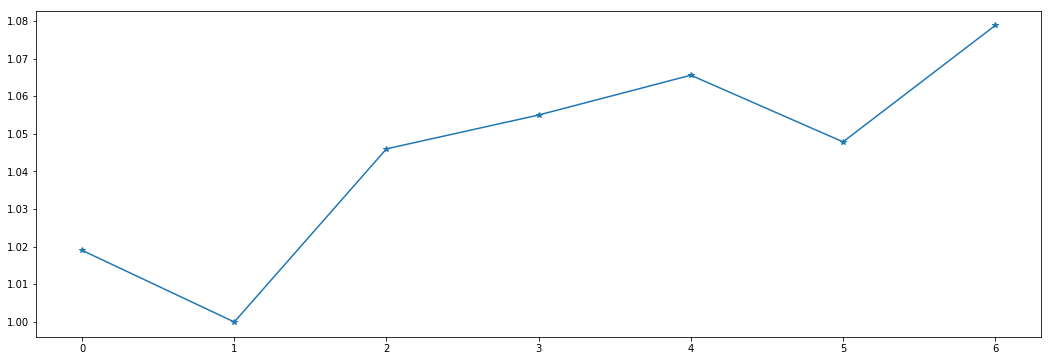

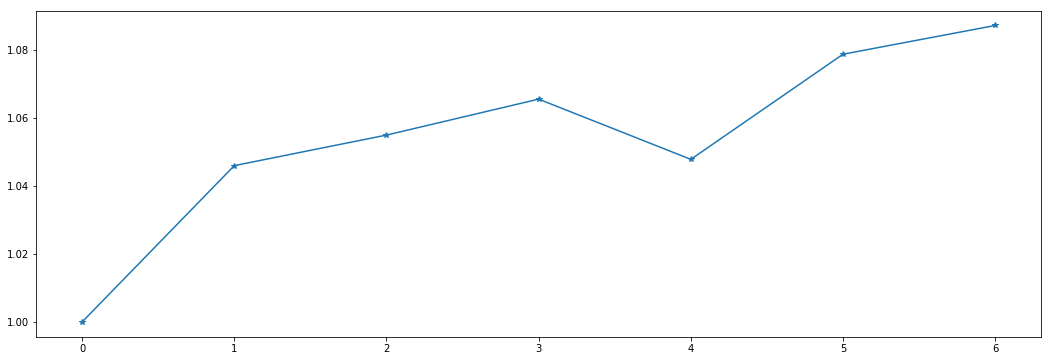

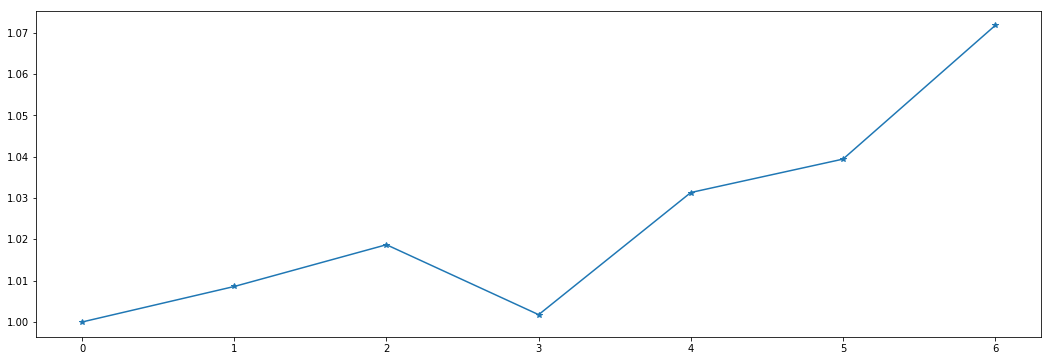

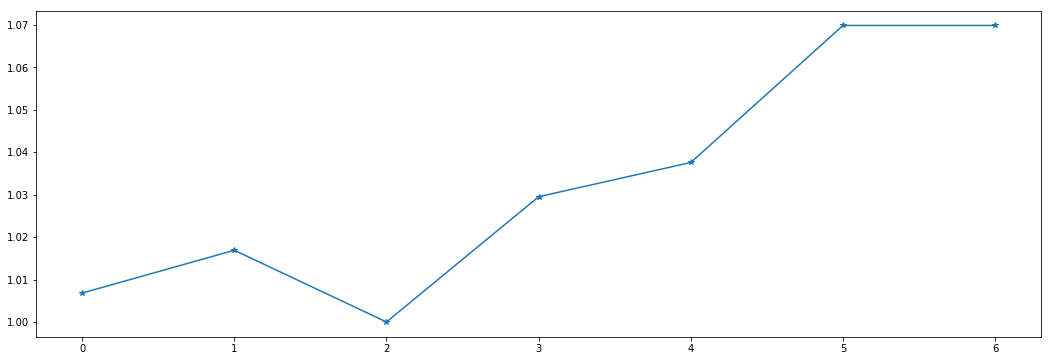

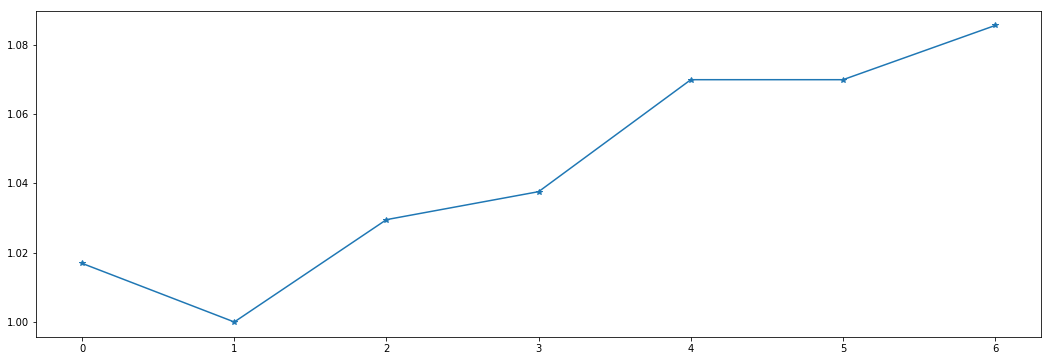

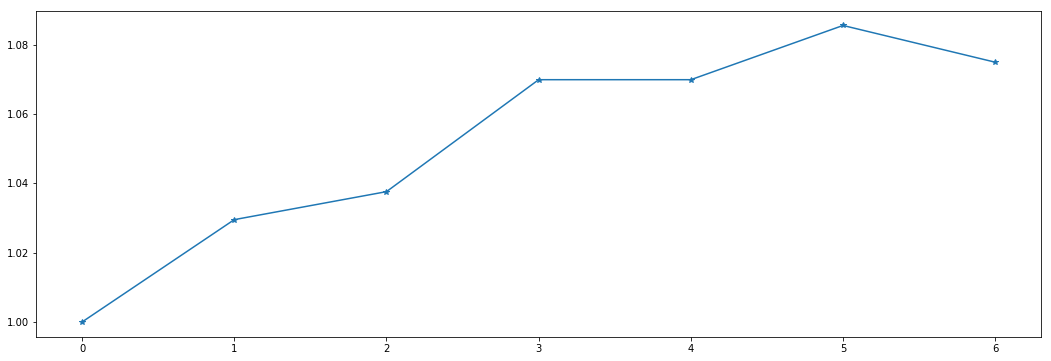

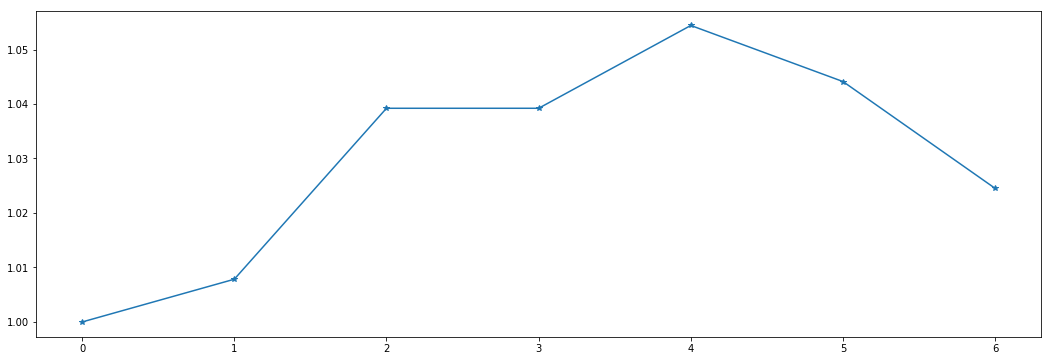

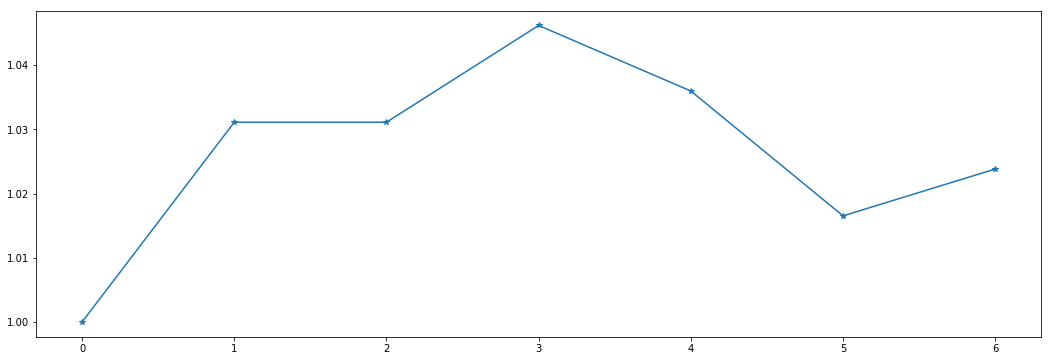

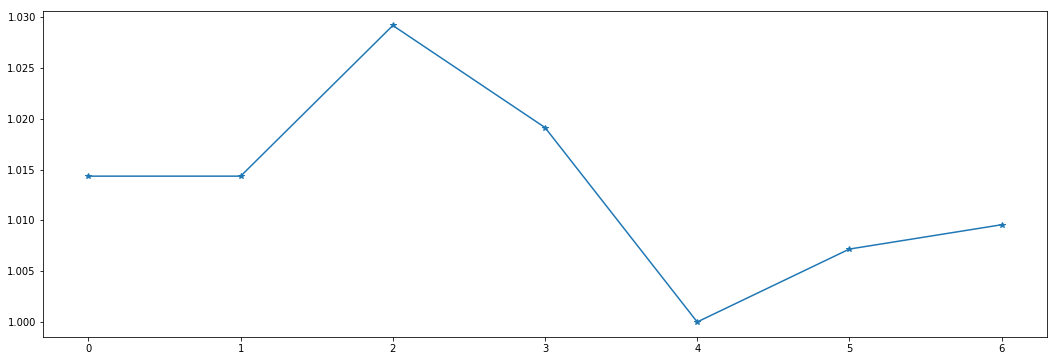

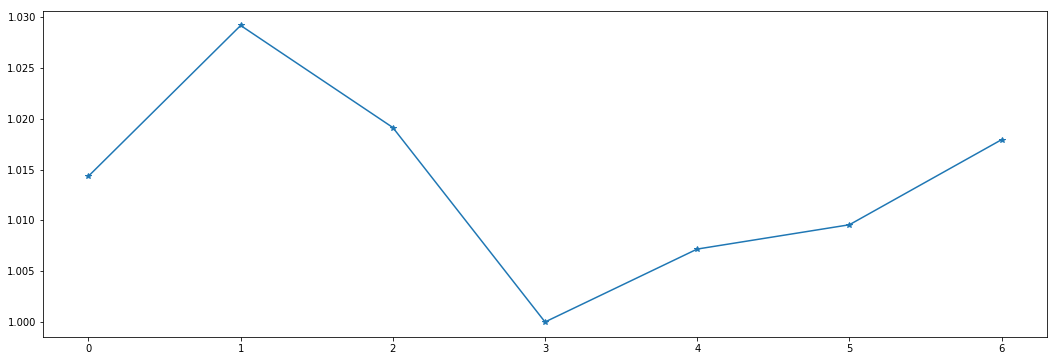

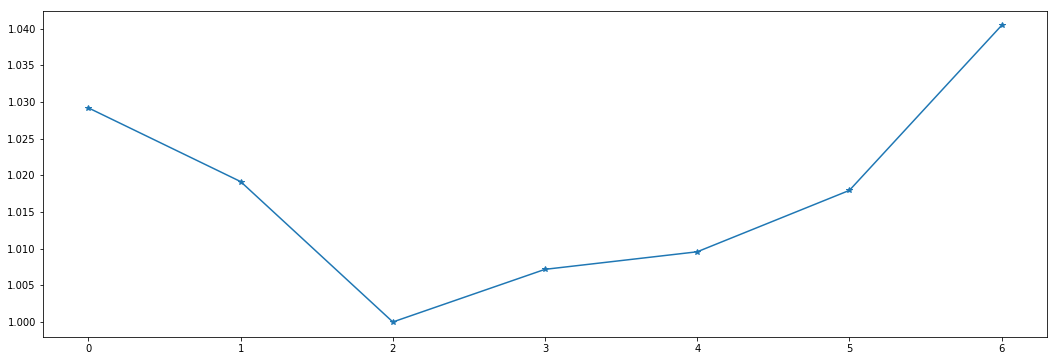

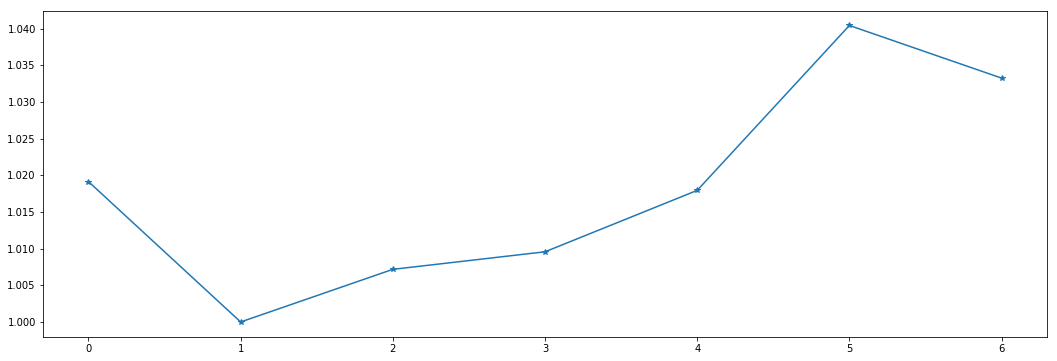

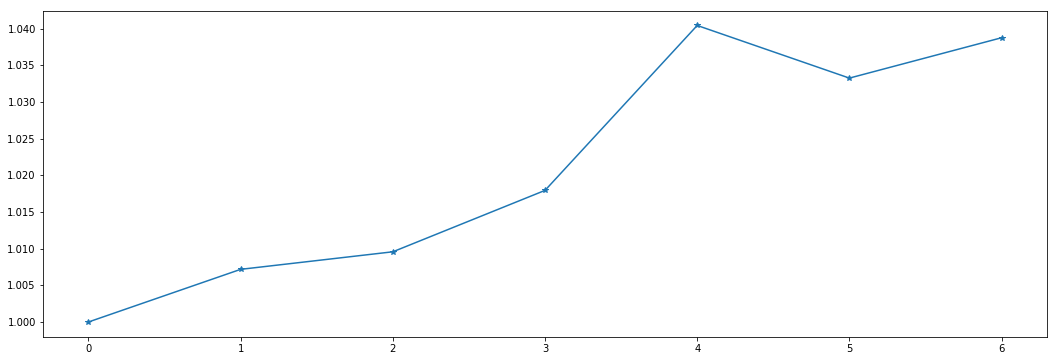

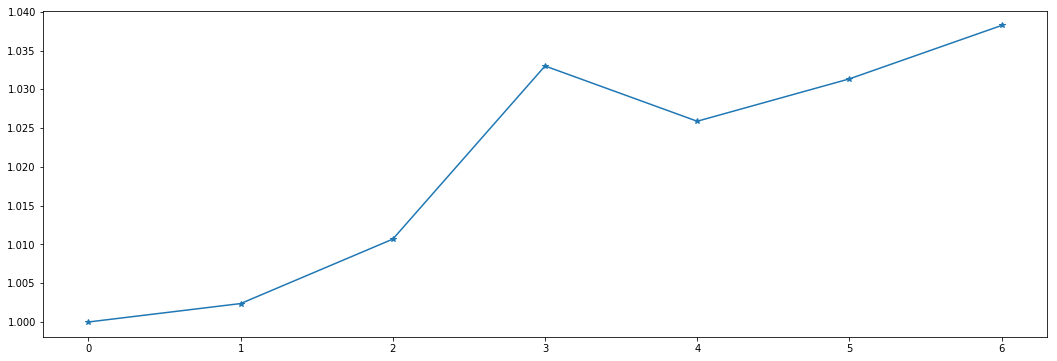

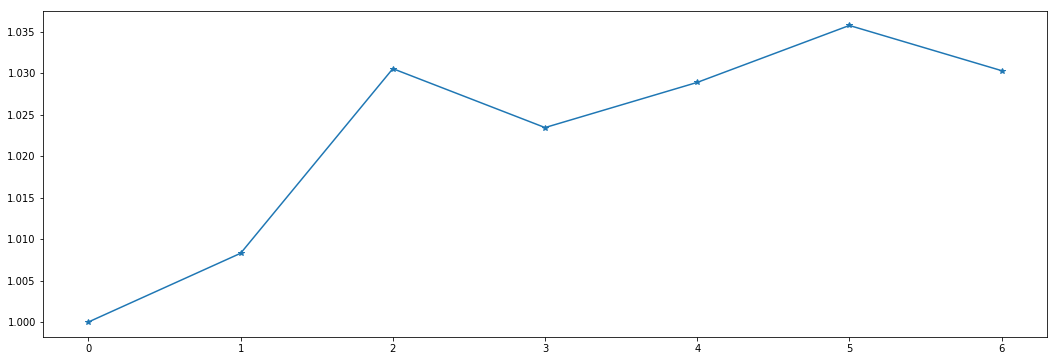

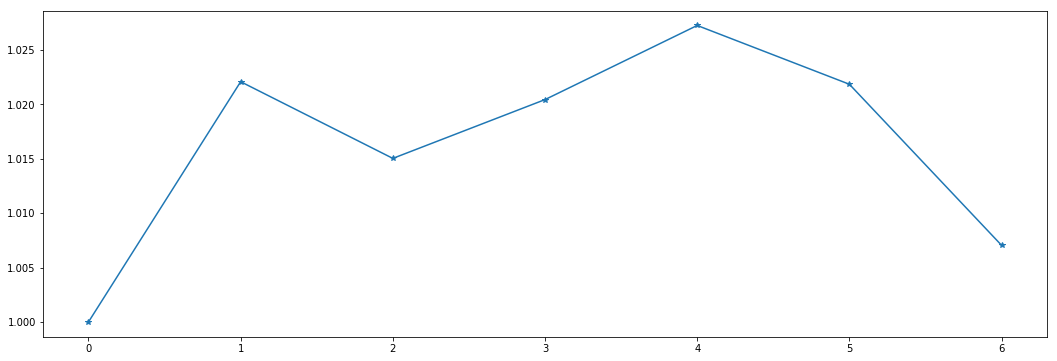

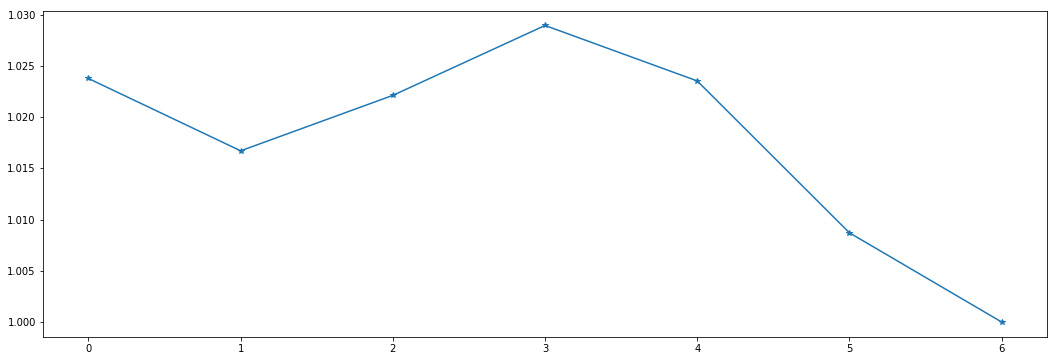

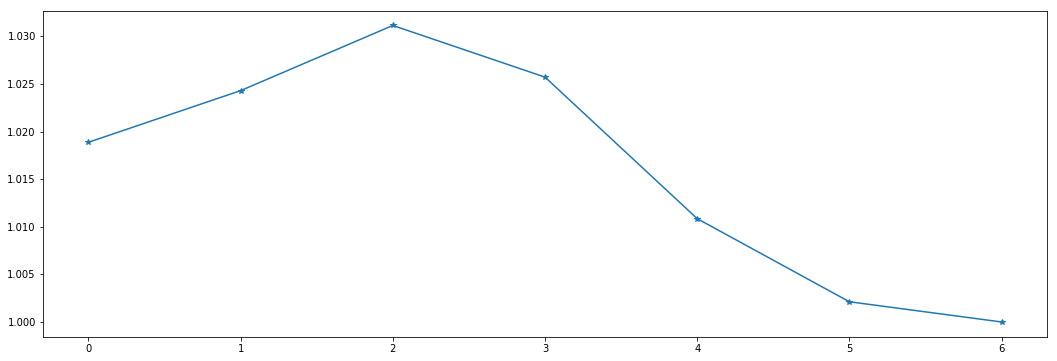

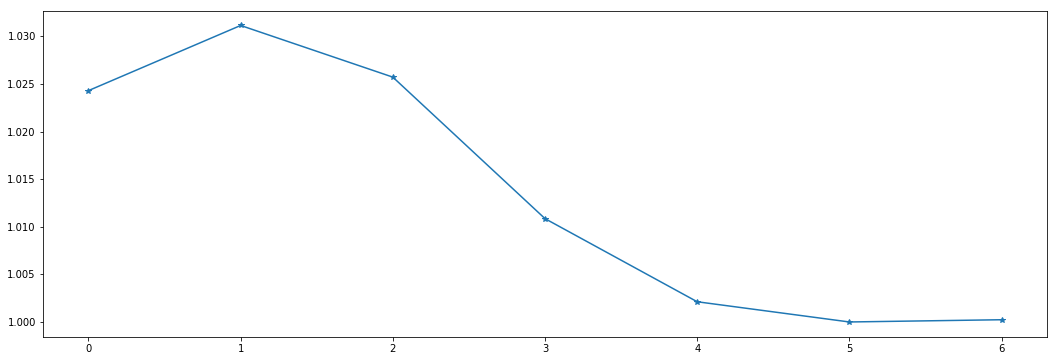

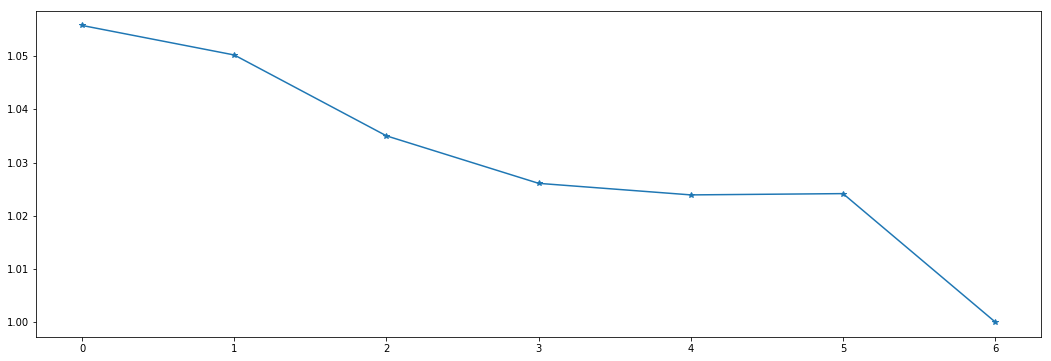

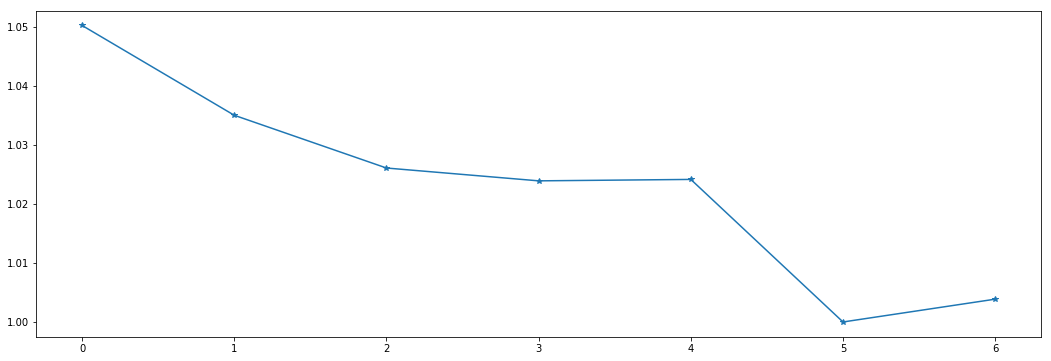

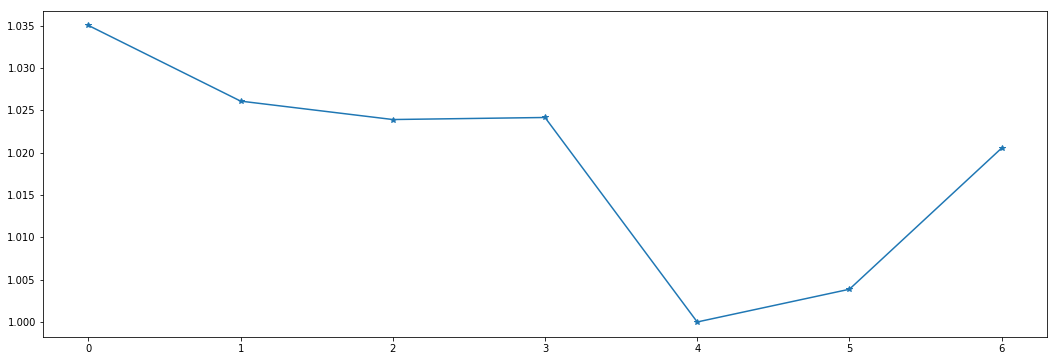

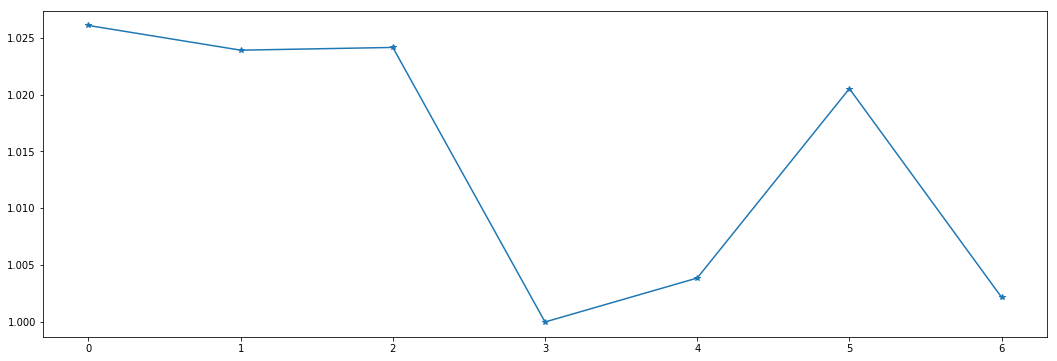

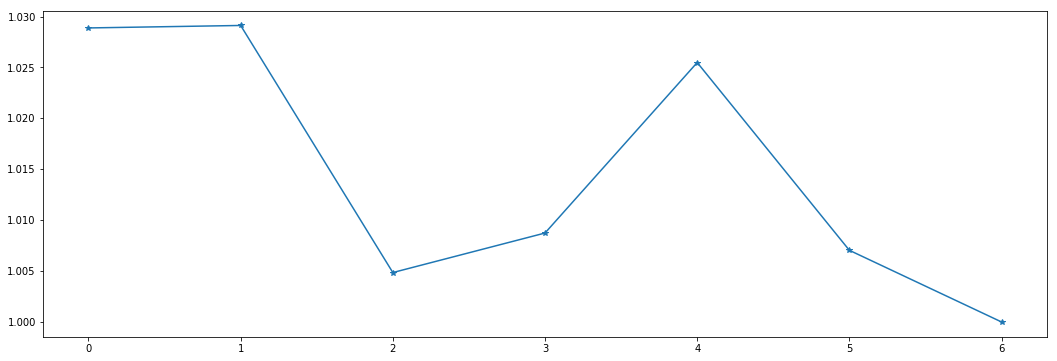

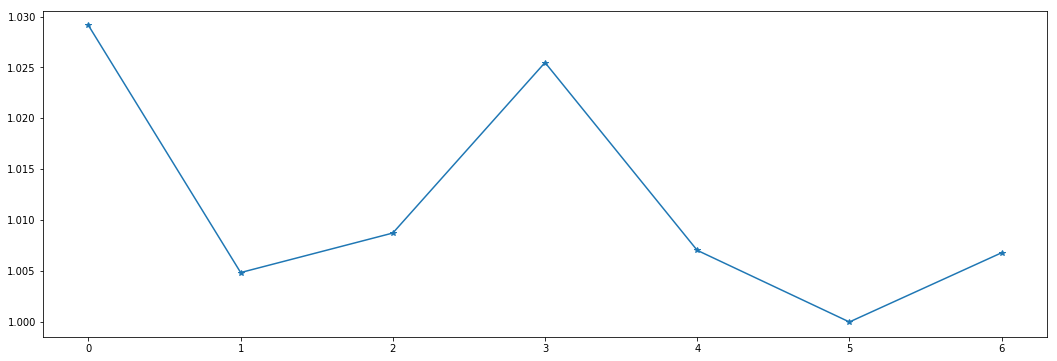

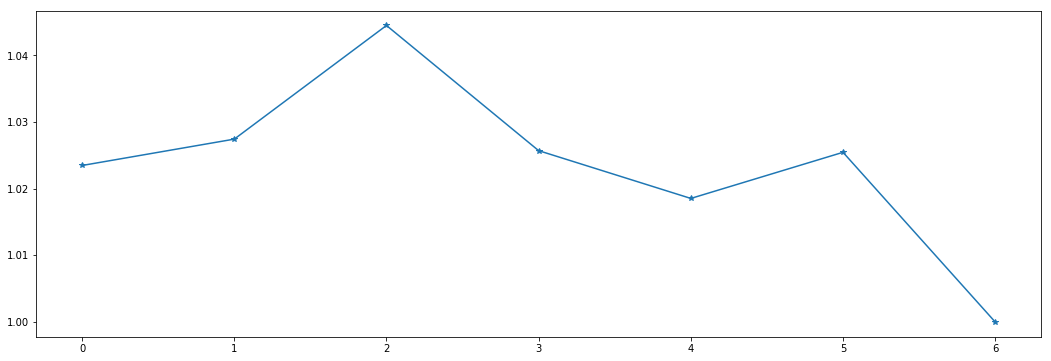

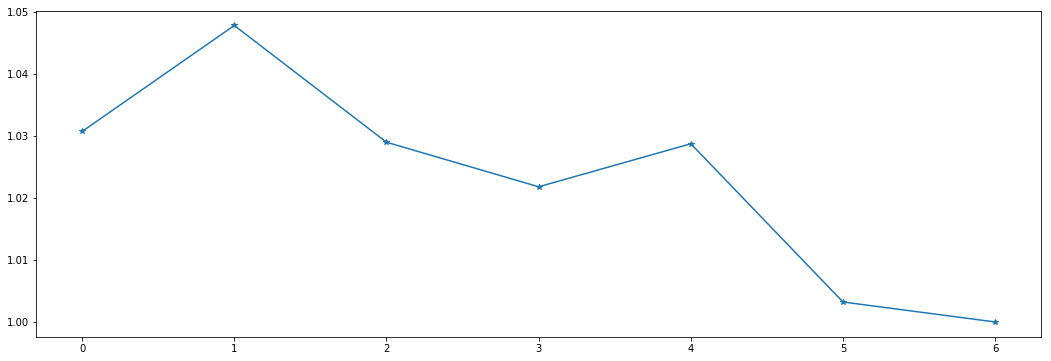

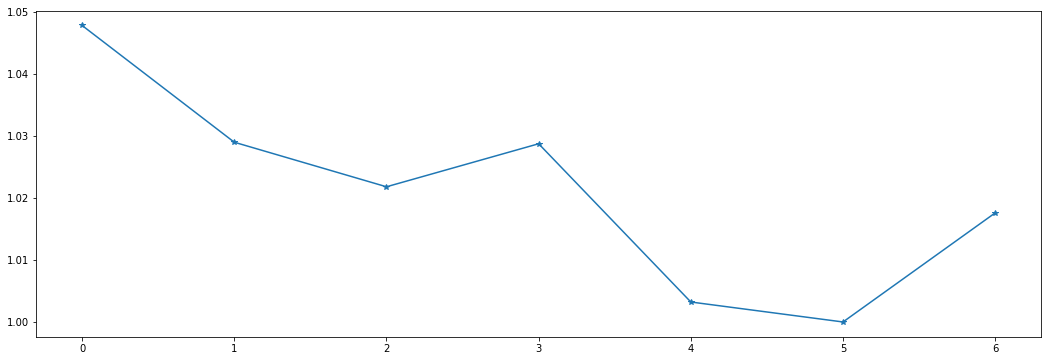

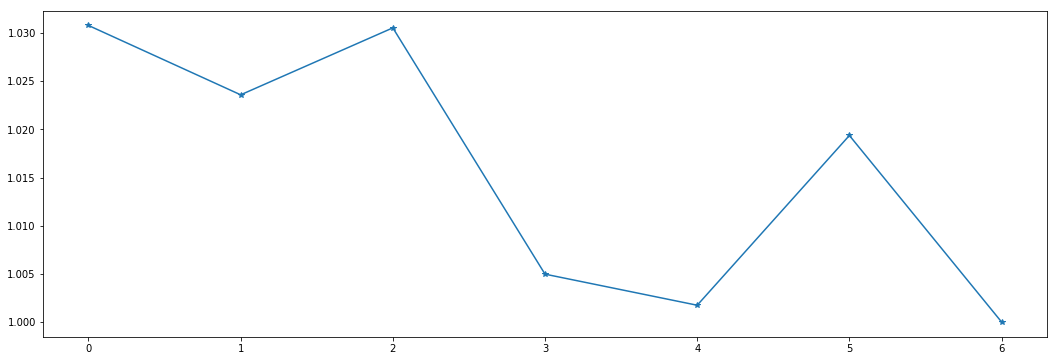

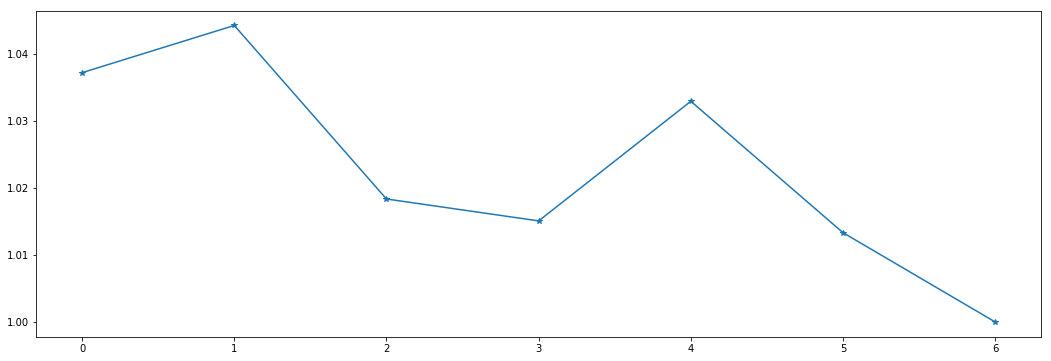

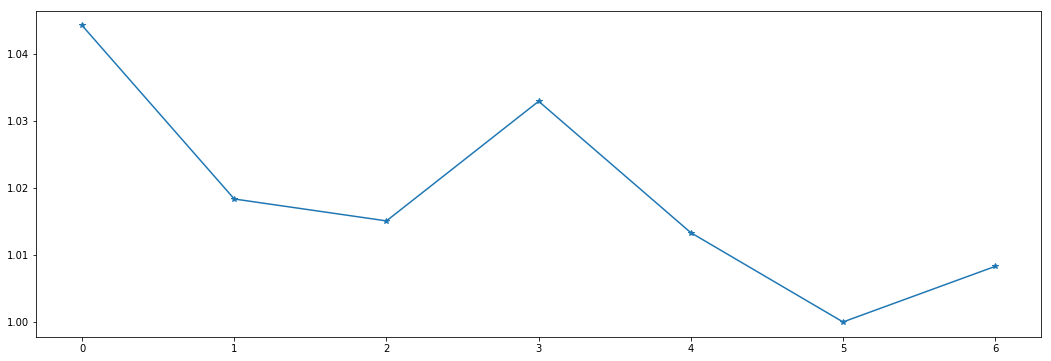

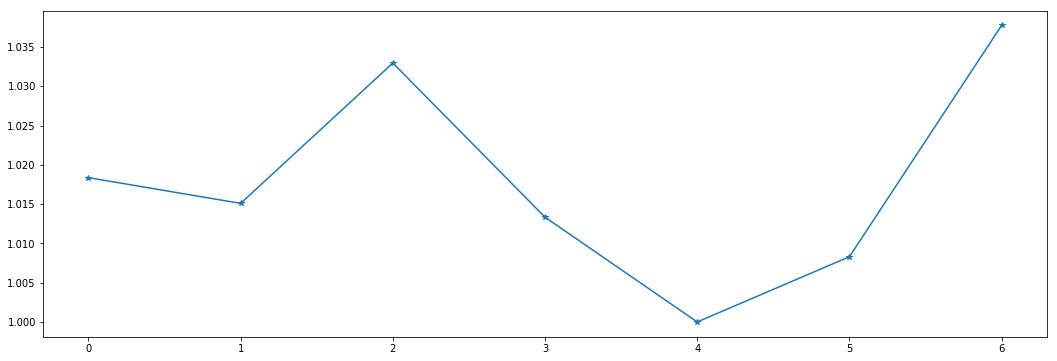

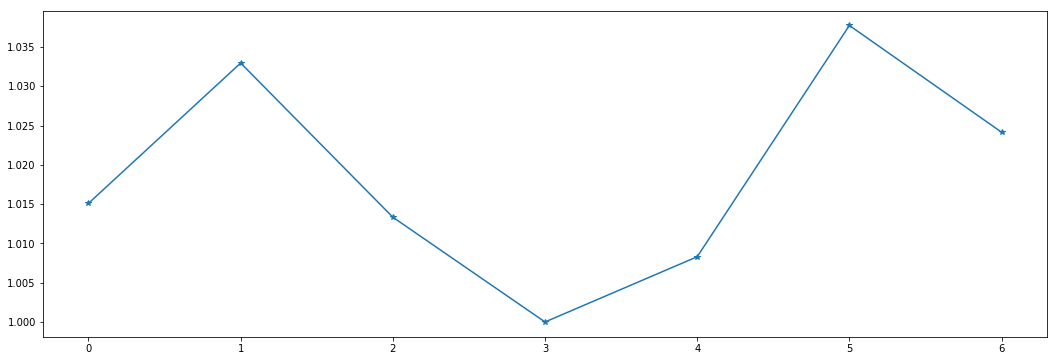

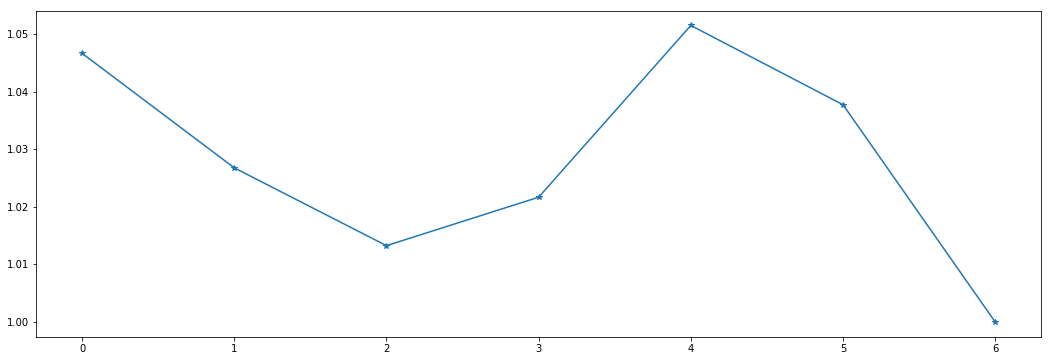

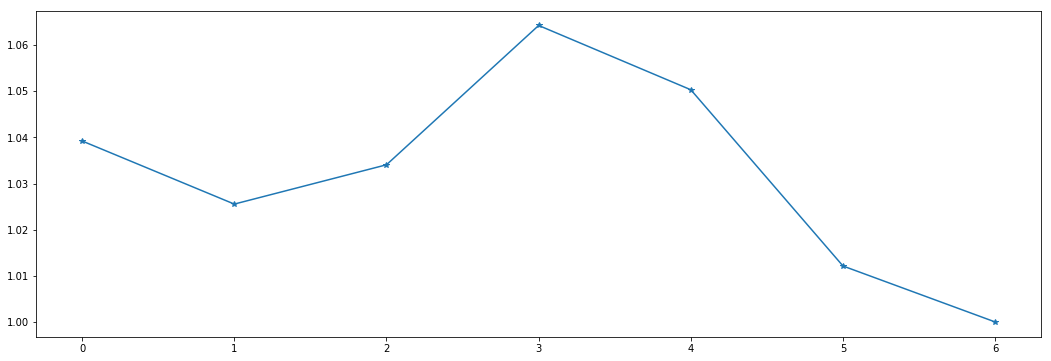

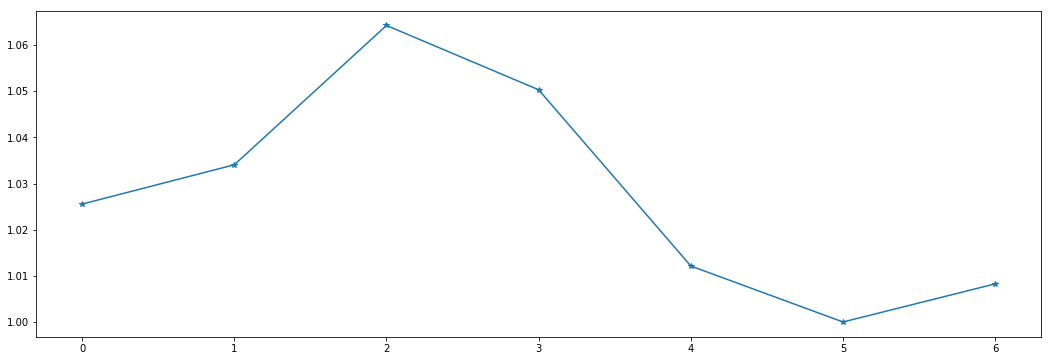

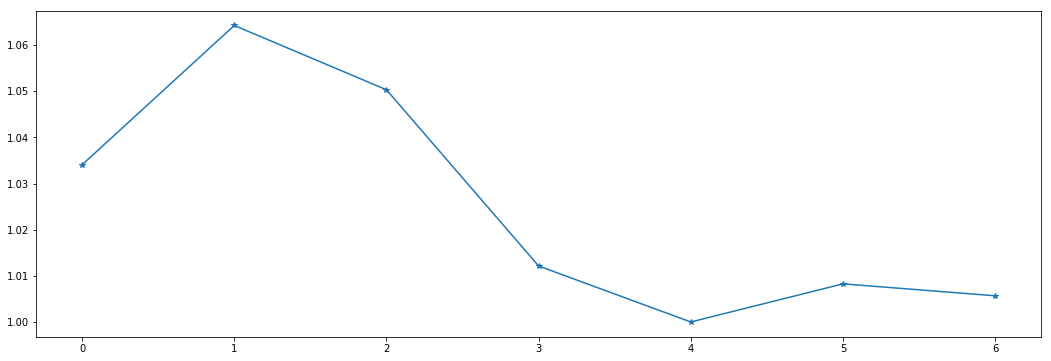

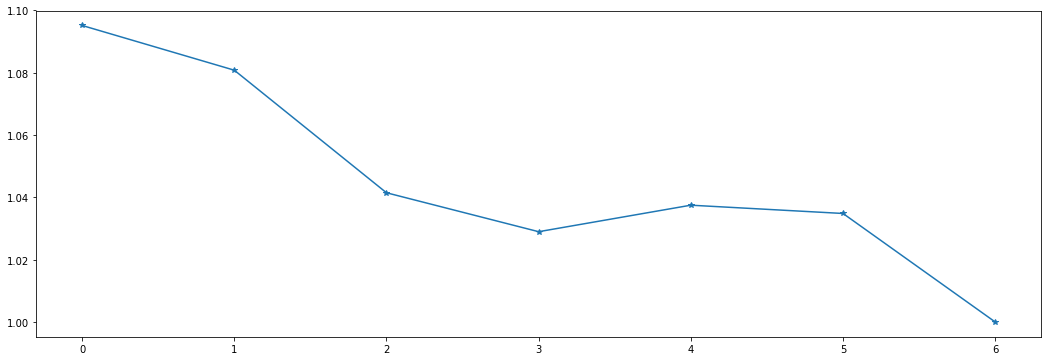

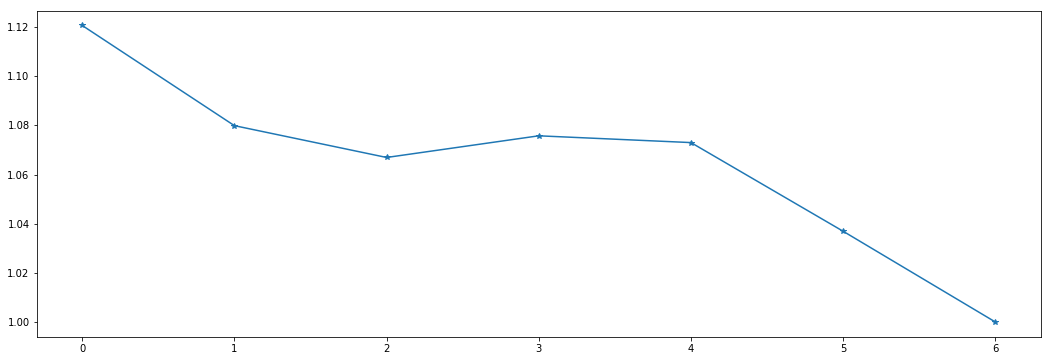

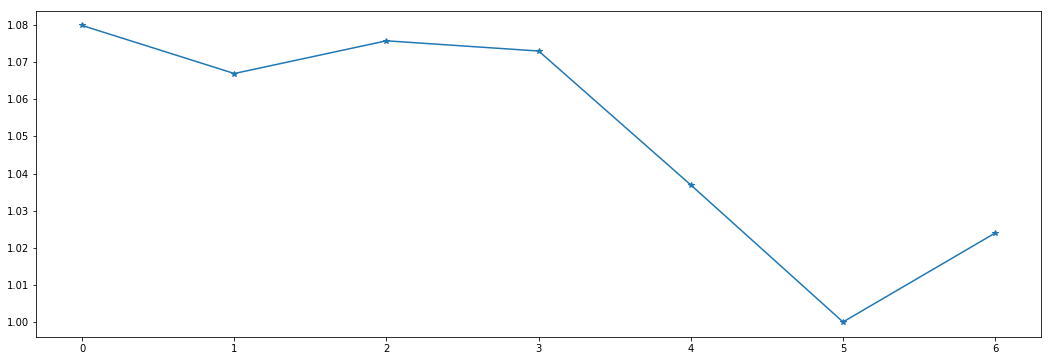

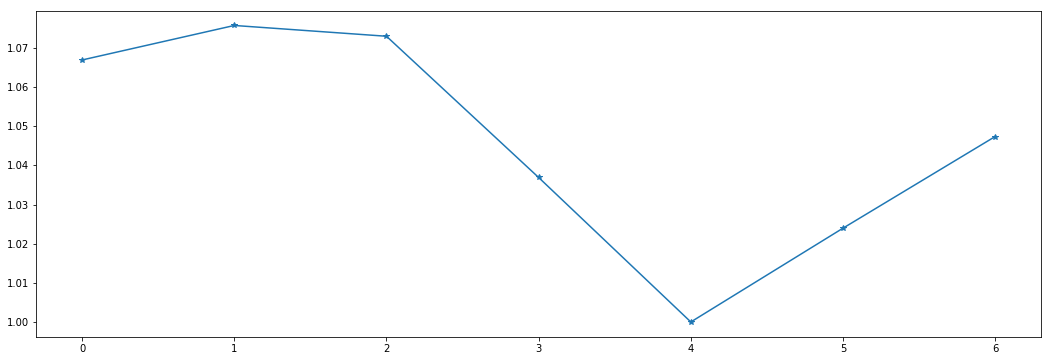

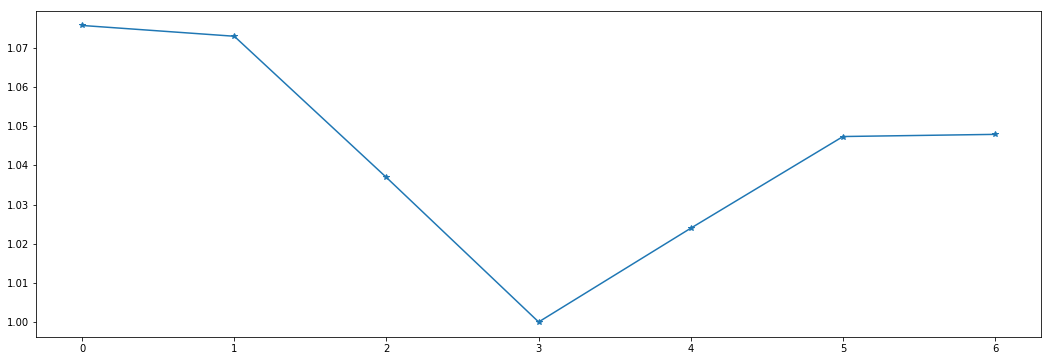

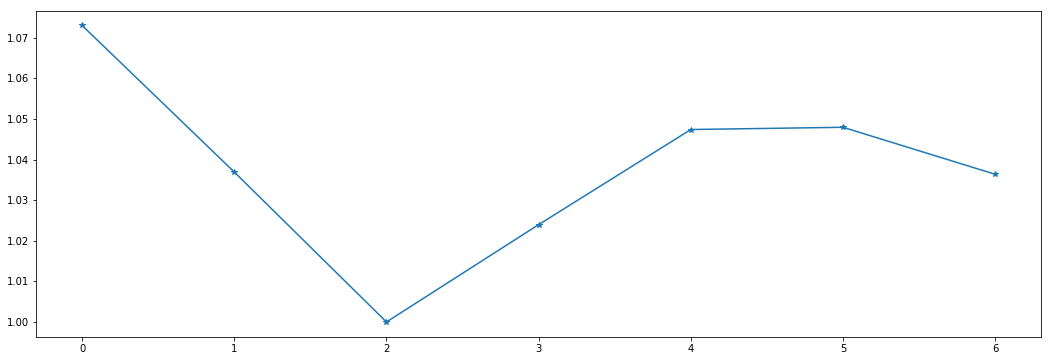

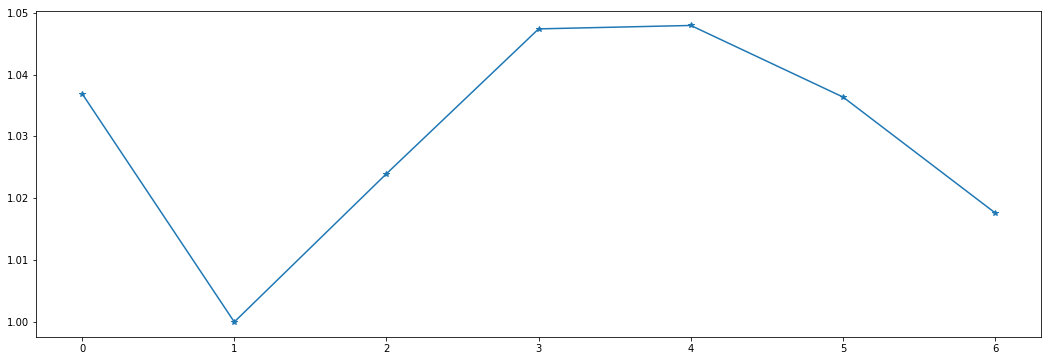

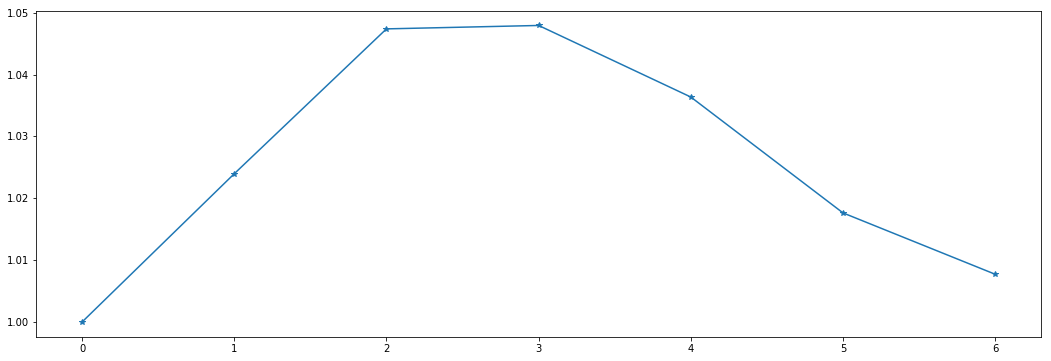

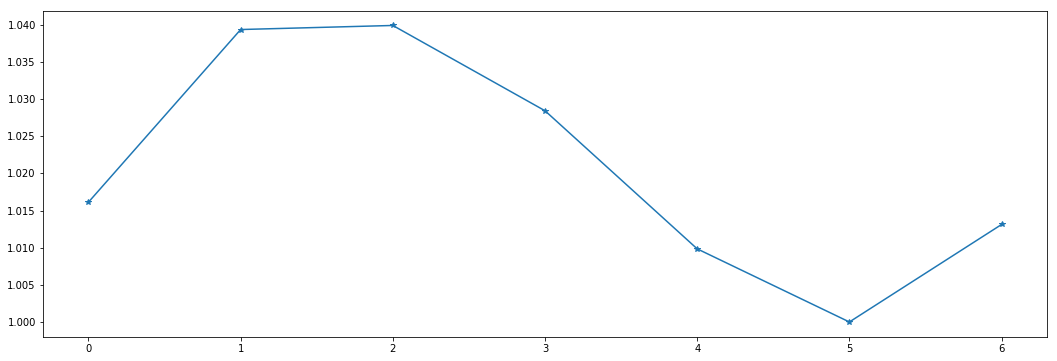

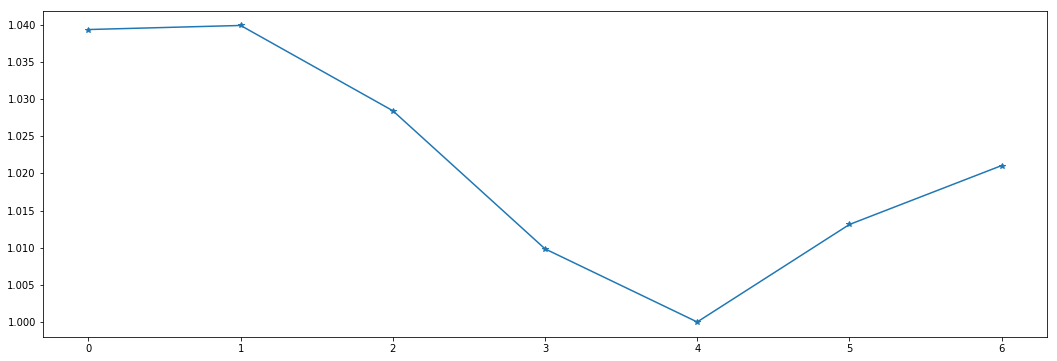

In [79]:
w = 7
results = []
for i in range(len(df)-w):   
    y = df['Close'].iloc[i:i + w].values
    m,b, r = lin_regression(y)
    results.append([i,m,r, b, ret])
    
results = np.array(results) 

In [43]:
results.shape

(93, 5)

In [81]:
data = {'i':(results[:,0]), 'Inc': (results[:,1]), 'R':results[:,2], 'b':results[:,3]}
df_ = pd.DataFrame(data)
df_.head()

i       Inc         R         b
0  0.0 -0.003566 -0.479432  1.027063
1  1.0 -0.005669 -0.685919  1.034376
2  2.0 -0.001995 -0.449893  1.016736
3  3.0 -0.001045 -0.223666  1.015011
4  4.0 -0.000164 -0.036012  1.011807

In [83]:
print(df_.shape)
df2 = df_[(df_['Inc'] > 2) & (df_['R'] > 0.80)]
print(df2.shape)
df2['Inc'].describe()

(93, 4)
(0, 4)


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Inc, dtype: float64

In [66]:
df2

i       Inc         R         b       Ang
10  10.0  0.036768  0.960302  0.960278  2.105729
13  13.0  0.041830  0.849405  0.954325  2.395298
14  14.0  0.058330  0.891830  0.938932  3.338253
15  15.0  0.066643  0.912464  0.926133  3.812701
16  16.0  0.068353  0.921476  0.926877  3.910270
17  17.0  0.068892  0.924554  0.933791  3.940993
24  24.0  0.056903  0.948507  0.941209  3.256764
25  25.0  0.057160  0.949742  0.948333  3.271468
26  26.0  0.037256  0.853483  0.962073  2.133633
31  31.0  0.128571  0.899822  0.851778  7.326407
32  32.0  0.140834  0.935081  0.848794  8.016462
33  33.0  0.121166  0.880931  0.890352  6.908613
34  34.0  0.097104  0.836546  0.940578  5.546256
35  35.0  0.047437  0.896717  0.953061  2.715921
46  46.0  0.063119  0.841826  0.949932  3.611634
47  47.0  0.068614  0.866911  0.951433  3.925169
48  48.0  0.062076  0.875547  0.931406  3.552117
49  49.0  0.071320  0.908842  0.925967  4.079452
50  50.0  0.082730  0.942915  0.920100  4.729283
51  51.0  0.079107  0.923504  0.933825  4.523063
58  58.0  0.042703  0.937122  0.956963  2.445236
59  59.0  0.040261  0.928373  0.959832  2.305556

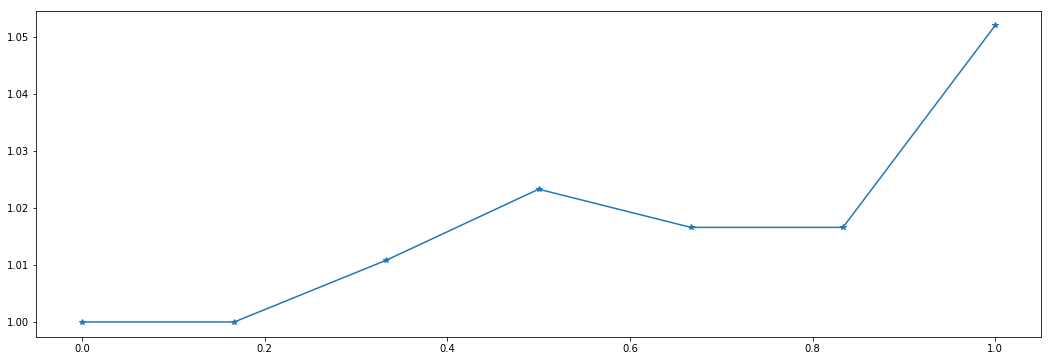

0.041830214513920654 0.8494045213799174


TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [76]:
i =13
w = 7
y = df['Close'].iloc[i:i + w].values

x = list(range(len(y)))
y = y/(min(y))
m,b, r = lin_regression(y)
print(m,  r)
y_ = x*m + b

plt.plot(x, y_)
plt.plot(x, y,'*-')
plt.show()

In [46]:
data = []
window = 20
for i in range(0, len(df)):
    data.append(df.iloc[i:i+window].values)


In [18]:
np.shape(data)

(100,)